# Cours

OC DS P4 - 4297211 [Entraînez un modèle prédictif linéaire](https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire)

# 1.1 Contrôlez la complexité de votre modèle

Inconvénients de la régression linéaire :
* coefficients corrélés ⇒ coefficients peu stables ⇒ interprétation compliquée
* nombre de variables $p$ > nombre d’observations $n$ : $X^\top X$ non inversible ⇒ solution non unique ⇒ pbs de surapprentissage

Solution : **régularisation** : au terme d’erreur à minimiser (somme des carrés), on ajoute un terme, dit de régularisation, qui mesure la complexité du modèle.

⇒ comment définir précisément ce terme ?

Rappel : plus un modèle est complexe plus il court le risque du sur-apprentissage.

La méthode consiste à compléter le terme à minimiser $(y - X\beta)^\top (y - X \beta)$ des moindres carrés ordinaires par un terme d'erreur qui est une mesure de la complexité du système, pour former une nouvelle fonction objective à minimiser :

$\arg \min_{\beta \in \mathbb{R}^{p+1}} \left((y - X\beta)^\top (y - X \beta) + \lambda \text{ Regularisateur}(\beta)\right)$

le régularisateur est une fonction des poids $\beta$ du modèle.

le facteur $\lambda$ est appelé **coefficient de régularisation**. Il contrôle l'importance relative du terme d'erreur quadratique et du terme de régularisation. S'il est faible voire nul, on retombe sur les coefficients des moindres carrés cordinaires. C'est un nouvel hyperparamètre, à déterminer à l'aide d'une recherche en grille avec validation croisée.




# 1.2 Réduisez l'amplitude des poids affectés à vos variables

Méthode de la régression de crête (*ridge regression*).

On utilise le carré de la norme 2 du coefficient de régression comme mesure de la complexité du modèle.

Soit :
* un jeu de données avec $n$ points et $p$ variables : $X \in \mathbb{R}^{n \times p}$
* un ensemble d'étiquettes : $y \in \mathbb{R}^n$

Régression linéaire = minimisation de la somme des moindres carrés.

Expression matricielle : $\min_{\beta \in \mathbb{R}^{p+1}} (y - X\beta)^\top (y - X \beta)$

Expression équivalente, en tant que norme 2 : $\min_{\beta \in \mathbb{R}^{p+1}} ||y - X\beta||^2_2$

Rappel (mais je ne me souviens pas de la première fois^^) :
* $\beta$ vecteur de dimension  $p+1$ :
$\beta=\begin{pmatrix}\beta_0\\\beta_1\\\vdots\\\beta_p\end{pmatrix}$
* Ajout aux données $X$ d'une première colonne de 1 :
$
  X =
   \begin{pmatrix}
    1 & x^1_1 & x^1_2 & \cdots & x^1_p\\
    1 & x^2_1 & x^2_2 & \cdots & x^2_p\\
    \vdots & \vdots & \cdots & \vdots & \\
    1 & x^n_1 & x^n_2 & \cdots & x^n_p\\
  \end{pmatrix} 
$

On ajoute au terme d'erreur un régularisateur qui est le carré de la norme 2 de $\beta$, i.e. la somme des carrés de ses composantes :

$||\beta||^2_2=\sum_{j=0}^p{\beta^2_j}$

Nous allons pénaliser les solutions qui minisent bien la somme des moindres carrés, mais avec de grandes amplitudes de valeur pour les entrées de $\beta$ (<mark>pas bien compris la fin de la phrase</mark>).

Pour jouer sur l'importance relative des deux critères, erreur de prédiction et complexité du modèle, on introduit le coefficient de régularisation $\lambda$, toujours positif. Plus il est important, plus les coefficients de $\beta$ sont pénalisés et seront donc petits :

$\min_{\beta \in \mathbb{R}^{p+1}} \left(||y - X\beta||^2_2+\lambda||\beta||^2_2\right)$

⇒ régularisation de Tikhonov, ou *régression d'arête*, ou *ridge regression*

Elle précise en texte que cela rappelle le *weiht decay* (dégradation / modération des pondérations) utilisées dans les réseaux de neurones.

Liens collectés pour la traduction, mais qui seront utiles pour mes approfondissements :
* https://fr.wikipedia.org/wiki/Régression_linéaire
* https://en.wikipedia.org/wiki/Linear_regression
* https://en.wikipedia.org/wiki/Ridge_regression
* https://en.wikipedia.org/wiki/Tikhonov_regularization
* https://fr.wikipedia.org/wiki/Régularisation_de_Tikhonov

⇒ elle a fait une erreur sur le nom de Tikhonov, et je sais maintenant que Google traduit mal ridge regression, qui n'est pas régression de crête, mais régression d'arête.


Elle dit : la fonction que nous cherchons à minimiser est convexe en $\beta$... hum... là ça ne va de soi d'interpréter ce qu'elle vient de dire.

Elle dit : il nous suffit donc d'annuler son gradient. Là ça me renvoie à des notions de prépa et d'école d'ingé que je n'ai pas révisées depuis bien longtemps : gradient, divergence, rotationnel et laplacien : p 145 dans mon formulaire Chambadal.

*Dans mon Warusfel, c'est le chapitre 23 (le dernier de l'analyse) Calculs de champs de vecteurs, p 667 et suivantes.*

*Là un topo math bien fait, avec de nombreux exemples et des exercices : https://personal.math.ubc.ca/~CLP/CLP4/clp_4_vc/sec_graadDivCurl.html*


* https://www.sangakoo.com/en/unit/gradient-of-a-scalar-field-divergence-and-rotational-of-a-vector-field
* https://openclassrooms.com/forum/sujet/gradient-divergent-rotationnel-laplacien
* La signification physique du gradient : https://www.youtube.com/watch?v=x0zhe3thgB8

*Je termine la vidéo sans tout comprendre donc, mais je mets en réserve ce travail de révision des fondamentaux mathémtiques sous-jacents.*

Il nous suffit donc d'annuler son gradient :
* gradient du terme d'erreur, cf. régression linéaire : $\nabla_\beta||y - X\beta||^2_2 = -2X^\top(y-X\beta)$
* terme de régularisation : également le gradient d'une forme quadratique : $\nabla_\beta\lambda||\beta||^2_2 = 2\lambda\beta$

En texte, elle précise que le gradient d'une forme quadratique se calcule de manière analogue à la dérivée d'un polynôme de degré 2.

On cherche à annuler la somme de ces deux termes : $\lambda\beta-X^\top(y-X\beta)=0$


$\Leftrightarrow (\lambda I + X^\top X)\beta=X^\top y$

Si $(\lambda I + X^\top X)$ est inversible, alors : $\beta = (\lambda I + X^\top X)^{-1}X^\top y$

Elle dit : ça tombe bien, si $\lambda > 0$, on garantit l'inversibilité de cette matrice.

Pourquoi ? Ca ne me suffit pas, j'ai besoin de comprendre !

A l'instinct, mais je manque de maîtrise, je dirais qu'on doit démontrer, avec un argument de diagonalisation, que le déterminant est le produit de termes diagonaux nécessairement strictement positifs.

Scatter $\lambda$ décroissant / $\beta$ croissant. Elle rappelle que la grandeur de $\lambda$ pèse sur les coefficients $\beta_i$. Plus $\lambda$ est proche de 0, plus c'est le fait de minimiser l'erreur de prédiction qui contera.

Si $\lambda$ est très grand, $\beta$ vaut 0, ce qui n'est pas intéressant, car on obtient un modèle qui ne prédit rien.

A mesure que $\lambda$ décroît, $\beta$ croit, et peut prendre des valeurs importantes.

J'ai du mal à la suivre sur ses variables $j=1$, $j=2$, etc quelles sont ces variables ?

Suivant les variables, $\beta$ plus ou moins grand, et peut même être négatif.. là j'avance sans comprendre car je ne comprends pas l'idée d'un $\beta$ variable suivant ... la variable.. kezako ?

Je viens de comprendre à 3:38.

Si je prends une 4ème variable fortement corrélée par exemple de $j=2$, alors leur $\beta$ seront proches.

Les variables sont bien les variables au sens des colonnes de $X$, et les $\beta$ sont les coefficients de $\beta$ correspondants. Pas une bonne pédagogue. J'aurais parlé de la variable $X_j$ et du coefficient $\beta_j$. Pourquoi créer de l'ambiguïté et donc de la confusion alors que l'on est sur un haut degré d'abstraction ? Au contraire, il faut être plus que jamais précis et concis, clair, à la Gauss.

Elle dit que ce rapprochement des valeurs des coefficients de $\beta$ entre deux variables corrélée vaut si $\lambda$ est suffisamment important. Ce qu'il manque, c'est une démonstration : pourquoi les coefficients seraient-ils proches si les variables sont corrélées ? Où est le lien ? Et pourquoi cela fonctionnerait dans le cadre de la régularisation de Tikhonov, mais pas pour la régression ordinaire ?



L'évolution du modèle en fonction de $\lambda$ est appelé le chemin de régularisation.


En résumé, les deux avantages à l'introduction de $\lambda \ge 0$ :
* assure l'existence d'une solution unique pour $\beta$.
* produit un effet de regroupement des coefficients pour les variables corrélées.

Utiliser d'autres normes que la norme 2 produit d'autres effets de régularisation : cf. suite du cours.


Je vais arrêter là, car mon cerveau surchauffe.

Il faudra que je repasse complètement dessus.

Elle ajoute notamment un argument intéressant dans le texte pour expliquer qu'en régression, si on amplifie par un scalaire une variable $x_j$ de $X$, alors on réduit d'autant son coefficient $\beta_j$.

Je pense qu'on ne peut pas bien se représenter ces abstractions sans des exemples concrets simples, martice 2 x 3 ou 3 x 3. Ce sera aussi l'occasion de pratique Numpy sur les opérations matricielles standard.

Dans mon exemple, il ne faudra pas oublier de produire des variables corrélées => petite fonction cf. mon $\mathcal{N}(\mu,\sigma^2)$ pour génerer.

Le next step maintenant, va être de l'utiliser sur P4.

# 1.3 Réduisez le nombre de variables utilisées par votre modèle

Ridge ⇒ permet de réduire les poids des coefficients $\beta_i$ associés à chacune des variables $\boldsymbol{x}_i$

Ces coefficients peuvent être très proches de 0 sans êtres nuls, ce qui signifie que toutes les variables seront utilisées dans le modèle.

L'effet des variables à coefficients quasi nuls est négligeable.

Objectif du chapitre : étude des méthodes qui permettent d'annuler les coefficients quasi nuls : on parle de méthodes *parcimonieuses* (*Sparse* en anglais)  ⇒  Lasso, ElasticNet.

On repart de la formulation Ridge :

Soit :
* un jeu de données avec $n$ points et $p$ variables : $X \in \mathbb{R}^{n \times p}$
* un ensemble d'étiquettes : $y \in \mathbb{R}^n$
* un coefficient de régularisation $\lambda \ge 0$

On cherche $\beta=\begin{pmatrix}\beta_0\\\beta_1\\\vdots\\\beta_p\end{pmatrix}$ qui minimise $\left(||y - X\beta||^2_2+\lambda||\beta||^2_2\right)$


On remplace la norme $\ell_2$ de $\beta$ par sa norme $\ell_1$ : $||\beta||_1=\displaystyle\sum_{j=0}^p |\beta_j|$


Attention : plus de solution analytique exacte, même si de nombreuses méthodes permettent d'obtenir une solution approchée, dont notamment l'**algorithme du gradient**.

**NB** > le problème du Lasso n'est pas strictement convexe, et n'a donc pas de solution unique.
En revanche $\boldsymbol{X}\beta$ est unique. En outre, deux solutions on nécessairement le même signe sur leur support (les coefficients non nuls).

Cette méthode s'appelle le Lasso (*Least Absolue Shrinkage and Selection Operator*).

*Shrinkage* comme réduction des poids proches de 0 pour les annuler.

Ce faisant, cela élimine les variables de coefficients nuls et permet donc de faire une *Selection*

C'est donc une méthode 1/ de sélection de variables 2/ de réduction de dimension supervisée.

Cette méthode s'appelle également (en traitement du signal), la **pousuite de base** (*basis pursuit*).

Comment ça marche ?

La formulation est équivalente à minimiser le terme d'erreur $||y - X\beta||^2_2$ sous la contrainte de $||\beta||_1 \le t, t \ge 0$, où $t$ dépend de $\lambda$.

Elle précise pour les curieux qui souhaitent approfondir que cette équivalence s'obtient par dualité et selon les conditions de [Karush-Kuhn-Tucker](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) qui est une généralisation des multiplicateurs de Lagrange.

Illustration graphique en dimension 2 : $|\beta_1| + |\beta_2| \le t$ définit la **région adminissible** qui prend la forme d'un carré dont les sommets sont $(\beta_1, 0)$, $(\beta_2, 0)$, $(-\beta_1, 0)$, $(-\beta_2, 0)$.


La suite est une *monstration* intuitive, pas une démonstration.


Etant donnée la solution $(\beta_1, \beta_2)$ de la régression liénaire ordinaire (supposée hors la région admissible, i.e. ne satisfaisant pas la contrainte).

Nous devons donc augmenter la valeur de l'erreur quadratique pour la rapproche de la région admissible.

Comme l'erreur est justement *quadratique*, on peut tracer ses lignes de niveau qui sont des ellipses. Sur chacune de ces lignes de niveau, l'erreur quadratique est la même, et elle augemente à mesure que l'on s'éloigne de la solution (le minimum sans contrainte).

Une de ces lignes de niveau va 'toucher' la région adminissible, et notre solution est à ce point d'intersection là.

La forme carrée avec coins de la zone admissible (en fait une boule $\ell_1$ de rayon $t$ c'est-à-dire un hypercube), qui résulte de la norme 1, entraîne que la probabilité est forte que l'intersection s'opère avec l'un de ces coin (par opposition avec la forme sphérique de la zone admissible avec la norme 2). C'est le 'truc' clé qui fait que la norme 2 n'annule pas un coefficient proche de 0 contrairement à la norme 1.

Comme pour Ridge, on peut tracer un chemin de régularisation.

Quand $\lambda$ s'annule, on retombe idem sur la régression ordinaire.

En revanche, à mesure que $\lambda$ décroit, les variables vont rester nulles plus longtemps, et rentrer dans le modèle les unes après les autres.

Si plusieurs variables sont corrélées, le Lasso va en choisir une aléatoirement et éliminer les autre. Il n'y a donc pas l'effet de sélection groupée du Ridge (toutes les variables corrélées sont sélectionnées et obtiennent un poids partagé identique).

Pour bénéficier des deux propriétés, parcimonie et sélection groupée, il suffit de combiner Ridge et Lasso.

On introduit un paramètre $\alpha, 0 \le \alpha \le 1$ et on on combine les termes de régularisation Ridge et Lasso :

$\displaystyle\min_{\beta \in \mathbb{R}^{p+1}} \left(||y - X\beta||^2_2+\lambda\left((1-\alpha)||\beta||_1+\alpha||\beta||^2_2\right)\right)$

Si $\alpha = 0$ on retriuve le Lasso, si $\alpha = 1$, on retrouve le Ridge.

La région admissible est elle aussi une combinaison entre le carré du Lasso et la sphère du Ridge (un carré bombé).

Cette méthode combinée s'appelle l'**Elastic Net**.

La contrepartie d'avoir les avantages des deux méthodes Ridge et Lasso, c'est de devoir trouver un couple de deux hyperparamètres $\alpha$ et $\lambda$.




# 1.4 TP - Comparez le comportement du lasso et de la régression ridge

### Chargement données

In [18]:
import pandas as pd

raw_data = pd.read_csv('TP_1_prostate_dataset.txt', sep='\t')
display(raw_data)

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...,...
92,93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


### Sélection et normalisation données

In [45]:
X = raw_data.iloc[:, 1:-3]
y = raw_data.iloc[:, -2]

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.25)

### Régression ordinaire comme baseline

In [46]:
# baseline
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Erreur baseline

In [47]:
# erreur **RSS** (*Residual Sum of Squares*)
import numpy as np
baseline_err = np.mean((lr.predict(X_test) - y_test) ** 2)
print(baseline_err)

0.7178476430763839


### recherche des hyperparamètres optimaux

In [48]:
n_alphas = 50
alphas = np.logspace(-5, 5, 50)   # distribution logarithmique entre 10^-5 et 10^5

ridge = linear_model.Ridge()

coefs, errors = [], []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

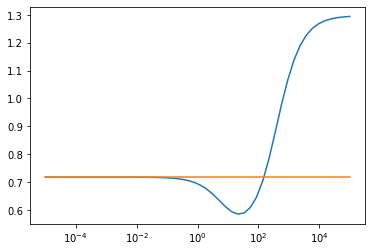

In [49]:
import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(alphas, errors, [10**-5, 10**5], [baseline_err, baseline_err])
ax.set_xscale('log')
plt.show()

In [50]:
i = np.argmin(errors)
err = errors[i]
print('argmin :', i, '->', err, '-> alpha :', alphas[i])

argmin : 31 -> 0.5849450759284021 -> alpha : 21.209508879201927


### Chemin de régularisation

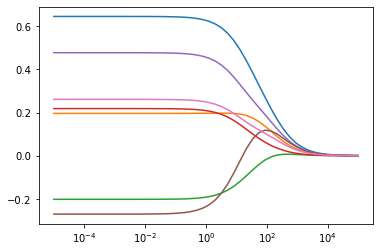

In [51]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.show()

## Lasso

In [52]:
n_alphas = 50
alphas = np.logspace(-5, 5, 50)   # distribution logarithmique entre 10^-5 et 10^5

lasso = linear_model.Lasso()

coefs, errors = [], []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

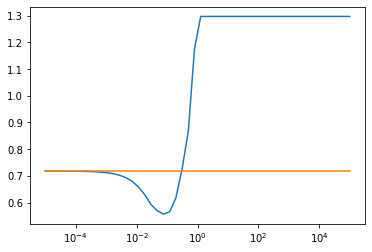

In [53]:
import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(alphas, errors, [10**-5, 10**5], [baseline_err, baseline_err])
ax.set_xscale('log')
plt.show()

In [54]:
i = np.argmin(errors)
err = errors[i]
print('argmin :', i, '->', err, '-> alpha :', alphas[i])

argmin : 19 -> 0.5565646069428607 -> alpha : 0.07543120063354623


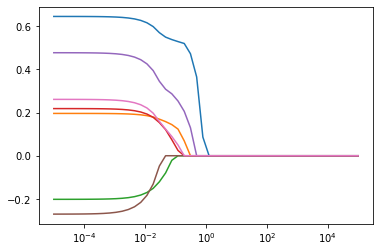

In [55]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.show()

In [63]:
X = np.array([[-0.78768, -1.51760513, 0.74416271, -0.62288928]])
y = np.array([[-34.59703199, -30.79543532, 19.31018182, -19.44809959]])

from sklearn import linear_model
lr = linear_model.LinearRegression().fit(X, y)
print(lr.intercept_)
print(lr.coef_)

print(y/X)
print(np.mean(y/X))

[-34.59703199 -30.79543532  19.31018182 -19.44809959]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[43.92269956 20.29212653 25.94887054 31.22240214]]
30.346524692219862


# 1.5 Quizz

Quizz de salaud, destiné à piéger plus qu'à valider l'assimilation des connaissances essentielles.

Q1

Par exemple, la première question porte sur des caractéristiques non explicitées dans la synthèse du cours :

Normalité du bruit : je ne me souviens pas avoir entendu parler du bruit.

Les observation sont 'iid' : je ne me souviens pas avoir entendu parler de cet iid.
https://www.youtube.com/watch?v=hZ5FOYIkFtw

* Independent
* Indentically
* Distributed

observations

-> restrictions on dependance, heterogeneity, 

Q3 - Il suffit d'appliquer la formule $\beta = (X^\top X)^{-1}X^\top y$

La source de ce dont il fallait se souvenir est le [3.2 Programmez votre proemière régression linéaire du cours Initiez-vous au Machine Learning](https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4121986-programmez-votre-premiere-regression-lineaire) :
* $\hat{y} = x^\top\theta$, avec $x^\top = (x_1, x_2, \cdots, x_n)$ et $\hat{y}^\top = (\hat{y}_1, \hat{y}_2, \cdots, \hat{y}_n)$
* ... pas limpide
* mais un renvoi sur une démonstration de la solution de de la minimisation : $\beta = \hat{\theta}= (X^\top X)^{-1}X^\top y$ : https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression

-> C'est de là que je dois repartir pour approfondir sur le plan mathémtique, mais il me faudrait une vraie ressource de référence qui couvre tout de A à Z, pour pouvoir me programmer un chemin d'apprentissage.


ok, mais si on attend ce niveau de maîtrise du formel, le cours devrait donner des liens vers des ressources de révision d'algèbre linéaire ciblées, et ce n'est pas le cas.

Q5 - c'est vraiment une question piège.. j'ai hésité : c'est donc la recherche sur grille (qui se charge d'observer l'erreur en fonction de lambda pour trouver son minimum)

Q7 - réponses multiples, mais une seule à sélectionner (pour la première fois) : j'ai pris le risque et ne suis pas tombé dans le panneau.

Q9 - faute de frappe de ma part, sinon j'aurais validé le quizz.


In [22]:
# commencer par recalculer Q3 à la main sur papier et ensuite à l'aide de numpy
import numpy as np
X = np.array([-0.78768, -1.51760513, 0.74416271, -0.62288928]).reshape(4, 1)
Y = np.array([-34.59703199, -30.79543532, 19.31018182, -19.44809959]).reshape(4, 1)
print(f'X ({X.shape}) :', X)
print(f'X^T ({X.reshape(1, 4).shape}) :', X.reshape(1, 4))
print('X^T.X :', X.reshape(1, 4).dot(X))
print('(X^T.X)^-1 :', np.linalg.inv(X.reshape(1, 4).dot(X)))
print('(X^T.X)^-1.X^T :', np.linalg.inv(X.reshape(1, 4).dot(X)).dot(X.reshape(1, 4)))
print('(X^T.X)^-1.X^T.Y :', np.linalg.inv(X.reshape(1, 4).dot(X)).dot(X.reshape(1, 4)).dot(Y))


"""print(X)
print(X**2)
print(np.sum(X**2))
X = X.reshape(4, 1)
Y = Y.reshape(1, 4)
print(X)
print(X.shape)
print(Y.shape)
print(X.dot(Y))"""


X ((4, 1)) : [[-0.78768   ]
 [-1.51760513]
 [ 0.74416271]
 [-0.62288928]]
X^T ((1, 4)) : [[-0.78768    -1.51760513  0.74416271 -0.62288928]]
X^T.X : [[3.86533431]]
(X^T.X)^-1 : [[0.25870983]]
(X^T.X)^-1.X^T : [[-0.20378056 -0.39261937  0.19252221 -0.16114758]]
(X^T.X)^-1.X^T.Y : [[25.99274029]]


'print(X)\nprint(X**2)\nprint(np.sum(X**2))\nX = X.reshape(4, 1)\nY = Y.reshape(1, 4)\nprint(X)\nprint(X.shape)\nprint(Y.shape)\nprint(X.dot(Y))'

# 2.1 [Prédisez linéairement la probabilité de l’appartenance d’un point à une classe](https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire/4507831-predisez-lineairement-la-probabilite-de-l-appartenance-d-un-point-a-une-classe)

Classification binaire : être ou ne pas être.

Les explications ne sont pas super intuitives, donc je reformule à ma manière :

Objectif : adapter les méthode de régression à la classification binaire.

Appartenir vs. ne pas appartenir à la classe peut se représenter à l'aide de l'ensemble {0, 1}

Déjà avec deux variables voit mal un modèle linéaire fonctionner pour prédire $\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0 | 1$

D'autre part, une fonction linéaire a pour image un ensemble continu compris entre $-\infty$ et $+\infty$.

L'idée principale est non pas de prédire de manière discrète l'appartenance ou non à la classe, mais de prédire la probabilité d'appartenance $P(Y=1|x)$.

En outre, une probabilité n'a pas un comportement linéaire.

Pour interfacer les deux mondes : la fonction logistique (la fonction de seuil du neurone) :

$\text{Logistic}(u) = \left(\frac{1}{1 + e^{-u}}\right)$


Transforme une image liénaire en une image comprise entre 0 et 1 qui a le comportement d'une probabilité.

$P(Y=1|x) = \text{Logistic} \left( \displaystyle\sum_{j=1}^p \beta_j x_j + \beta_0 \right)$

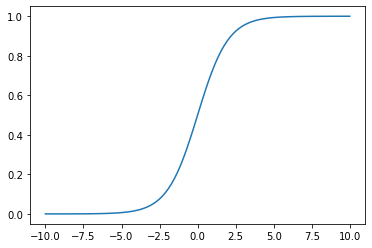

In [23]:
import numpy as np
import matplotlib.pyplot as plt

u = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-u))
plt.plot(u, y)

Malgré son nom, la régression logistique sert à résoudre des problèmes de classification.

Comme pour la régression linaire, il va s'agir de maximiser la vraisemblance.

Là, elle dit souvenez-vous, mais j'ai le sentiment de ne pas me souvenir : quand, quelle partie de cours ?

vraisemblance :
* $p\left(\mathcal{D}|\beta\right)$, avec $\mathcal{D}=\{x^i, y^i\}_{i=1, \cdots, n}$
* (condition iid) $p\left(\mathcal{D}|\beta\right) = \displaystyle\prod_{i=1}^n p\left(x^i, y^i|\beta\right)$
* $= \displaystyle\prod_{i=1}^n p\left(y^i|x^i, \beta\right)p\left(x^i\right)$

$p\left(x^i\right)$ indépendant de $\beta$, il s'agit donc de maximiser :

$\displaystyle\max_{\beta \in \mathbb{R}^{p+1}} \prod_{i=1}^n p\left(y^i|x^i, \beta\right)$

Passage à une somme grâce au log :

$\displaystyle\max_{\beta \in \mathbb{R}^{p+1}} \sum_{i=1}^n \log{p\left(y^i|x^i, \beta\right)}$

Là, je surnage..

Dans notre cas :

$\displaystyle\max_{\beta \in \mathbb{R}^{p+1}} \sum_{i=1}^n y^i \log{\left(p(Y=1|x^i)\right)} + (1-y^i)\log{\left(1 - p(Y=0|x^i)\right)}$

Il me faut un cours qui explique mieux !

Reste à remplacer les deux probabilités par leur expression logistique :

$\displaystyle\max_{\beta \in \mathbb{R}^{p+1}} \sum_{i=1}^n y^i \log{\left(\frac{1}{1 + e^{-(\beta^\top x^i)}} \right)} + (1-y^i)\log{\left(\frac{1}{1 + e^{-(\beta^\top x^i)}}\right)}$

Pas de solution explicite.

Mais expression concave -> on peut utiliser la méthode du gradient pour trouver une bonne approximation.

Les techniques de régularisation qui permettent d'obtenir des modèles parcimonieux et d'éviter le surapprentissage s'appliquent également à la régression logistique.

Au chapitre suivant, autre technique pour créer un classificateur linéaire avec le SVM.

https://fr.wikipedia.org/wiki/Fonction_logistique_(Verhulst)

https://en.wikipedia.org/wiki/Logistic_function : permet d'approfondir



# 2.2 [Maximisez la marge de séparation entre vos classes](https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire/4507841-maximisez-la-marge-de-separation-entre-vos-classes)


Vu comment séparer deux classes à l'aide d'une méthode linéaire avec la régression logistique.

Autres méthodes pour déterminer le meilleur hyperplan qui sépare deux classes.

L'une d'entre elles : SVM (*Support Vector Machines*).

On démarre avec le cas **linéairement séparable** : en 2D, cela signifie qu'il existe une droite qui sépare les points des deux classes. Par ext., en nD, il existe un hyperplan.

NB > une ne veut pas dire unique : il en existe même une infinité. En revanche, elles ne donnent évidemment pas les mêmes prédictions.

Quelle est la droite (l'hyperplan) idéal parmi toutes les possibilités ?


Pour une droite (un hyperplan) donnée, on définit une zone (un tube) dont le rayon est la distance (perpendiculaire) au point le plus proche. On appelle cette zone, **la marge**.

L'idée du SVM, est de choisir parmi l'ensemble des droites possibles celle dont la marge est la plus grande.

Chercher la droite à plus grande marge justifie l'expression parfois employée en français pour le SVM, *Séparatrice à Vaste Marge*.

Notons que si la marge est en contact avec un ou plusieurs plus proches de l'une des deux classes, mais pas de l'autre, il suffit de la déplacer sur une position parallèle qui la rapproche de l'autre classe de telle sorte que la marge soit plus large et en contact avec un point de cette autre classe. La droite est donc exactement à mi chemin entre les deux frontières de sa marge (les parois du tube), lesquelles sont toutes deux en contact avec un point de chacune des deux classes.

Les points de contact qui définissent la droite sont appelés **vecteur de support**, ce qui donne son nom à la méthode.

Formalisation :
* un jeu de données avec $n$ points et $p$ variables : $X \in \mathbb{R}^{n \times p}$
* un ensemble d'étiquettes : $y \in \{-1, 1\}^n$


On cherche l'hyperplan séparateur qui a la plus grande marge.

L'équation de cet hyperplan est $\left<\boldsymbol{w}, \boldsymbol{x}\right> + b = 0$, où $\left<., .\right>$ est le **produit scalaire** des deux vecteurs de support $\boldsymbol{w}$ et $\boldsymbol{x}$.

Là, elle ne dit pas explicitement qui sont $\boldsymbol{w}$ et $\boldsymbol{x}$, et je suppose que ce sont les deux points de contact.

Les deux parois sont parallèles à l'hyperplan séprateur et donc d'équation $\left<\boldsymbol{w}, \boldsymbol{x}\right> + b = cste$

En outre, l'hyperplan est à mi-distance de ces deux parois, ce qui entraîne que les deux $cste$ sont opposées.

On fixe par convention ces deux constantes à -1 et 1.

Les points appartenant aux deux classes sont resp. les points tq :
* $\left<\boldsymbol{w}, \boldsymbol{x}\right> + b \gt 1$
* $\left<\boldsymbol{w}, \boldsymbol{x}\right> + b \lt -1$

<mark>A réviser</mark> :
* produit scalaire
* équation d'un hyperplan

Ces équations étant posées, on peut déterminer le diamètre $\gamma$ de la marge.

Son rayon $\gamma/2$ est la distance entre un point B de la droite et sa projection A sur l'une des deux parois du tube.

$\gamma = 2||A - B|| = \frac{2}{||\boldsymbol{w}||}$

<mark>**NB**</mark> > là, c'est le coup du chapeau magique : j'ai besoin de comprendre pourquoi, mais les explications ne me le permettent pas.

Nous cherchons donc $\displaystyle\max_{\boldsymbol{w} \in \mathbb{R}^p} \frac{2}{||\boldsymbol{w}||}$

La fonction de décision avec ce modèle : $f(\boldsymbol{x}) = \left<\boldsymbol{w}, \boldsymbol{x}\right> + b$

Suivant le signe de la fonction, la prédiction est dite **positive** ou **négative**.

Retour au jeu d'entraînement :
* prédiction positive : $f(\boldsymbol{x}) \ge 1 \Rightarrow y = 1$
* prédiction négative : $f(\boldsymbol{x}) \le -1 \Rightarrow y = -1$

On peut réunir les deux cas en une seule formulation : $yf(\boldsymbol{x}) \ge 1$

En résumé, nous cherchons $\displaystyle\max_{\boldsymbol{w} \in \mathbb{R}^p} \frac{2}{||\boldsymbol{w}||}$ sous la contrainte $y\left(\left<\boldsymbol{w}, \boldsymbol{x}\right> + b\right) \ge 1$

Pour des raisons pratiques, on cherche $\displaystyle\min_{\boldsymbol{w} \in \mathbb{R}^p} \frac{1}{2}||\boldsymbol{w}||^2$, ce qui est équivalent.

Résumé du problème d'optimisation :
* $X \in \mathbb{R}^{n \times p}$
* $y \in \{-1, 1\}^n$
* $\displaystyle\min_{\boldsymbol{w} \in \mathbb{R}^p} \frac{1}{2}||\boldsymbol{w}||^2$ tq $y^{(i)}\left(\left<\boldsymbol{w}, \boldsymbol{x}^{(i)}\right> + b\right) \ge 1, \forall i \in \{1, \cdots, n\}$

Par les **multiplicateurs de Lagrange**, ce problème à $n$ contraintes est équivalent à celui-ci :

<mark>A "réviser"</mark> :
* multiplicateurs de Lagrange


$\displaystyle\max_{\alpha \in \mathbb{R}^n_+} \left( \displaystyle\min_{\substack{\boldsymbol{w} \in \mathbb{R}^p\\b \in \mathbb{R}}} \left( \frac{1}{2}||\boldsymbol{w}||^2  - \displaystyle\sum_{i=1}^n \alpha_i \left( y^{(i)}\left(\left<\boldsymbol{w}, \boldsymbol{x}^{(i)}\right> + b\right) - 1 \right) \right) \right)$ (A)

<mark>La suite est hardcore et cela ne fait pas partie des notions de niveau license (de mon époque)</mark>

On a introduit un nouveau terme réel $\alpha_i$ pour chacun des points du jeu d'entraînement.

L'équivalence entre les deux lignes est vraie sous les conditions de **Karush-Kuhn-Tucker** (*KKT*) : soit $\alpha_i$, soit l'autre terme sous la somme, $y^{(i)}\left(\left<\boldsymbol{w}, \boldsymbol{x}^{(i)}\right> + b\right) - 1$ est égal à 0.

<mark>A nouveau un saut de raisonnement non vraiment justifié et totalement incompréhensible sans les bases nécessaires :</mark>

En posant $L_p = \frac{1}{2}||\boldsymbol{w}||^2  - \displaystyle\sum_{i=1}^n \alpha_i \left( y^{(i)}\left(\left<\boldsymbol{w}, \boldsymbol{x}^{(i)}\right> + b\right) - 1 \right)$

Résoudre la condition KKT revient à déterminer $\boldsymbol{w}$ tq $\nabla_{\boldsymbol{w}} L_p = 0$ et de même $\nabla_b L_p = 0$

On obtient les équations suivantes :
* $\nabla_{\boldsymbol{w}} L_p = 0 \Rightarrow \boldsymbol{w} = \displaystyle\sum_{i=1}^n \alpha_i y^{(i)} \boldsymbol{x}^{(i)}$
* $\nabla_b L_p = 0 \Rightarrow \displaystyle\sum_{i=1}^n \alpha_i y^{(i)} = 0$

Ce qui permet de reformuler (A) de la manière suivante :

$\displaystyle\max_{\alpha \in \mathbb{R}^n_+} \left( -\frac{1}{2} \displaystyle\sum_{i=1}^n \displaystyle\sum_{j=1}^n \alpha_i \alpha_j y^{(i)} y^{(j)}\left<\boldsymbol{x}^{(i)}, \boldsymbol{x}^{(j)}\right> + \displaystyle\sum_{i=1}^n \alpha_i \right)$ tq $\displaystyle\sum_{i=1}^n \alpha_i y^{(i)} = 0$


Nous disposons de deux formulations équivalentes du problème de maximisation de la marge.
* $\displaystyle\min_{\boldsymbol{w} \in \mathbb{R}^p} \frac{1}{2}||\boldsymbol{w}||^2$ tq $y^{(i)}\left(\left<\boldsymbol{w}, \boldsymbol{x}^{(i)}\right> + b\right) \ge 1, \forall i \in \{1, \cdots, n\}$
* $\displaystyle\max_{\alpha \in \mathbb{R}^n_+} \left( -\frac{1}{2} \displaystyle\sum_{i=1}^n \displaystyle\sum_{j=1}^n \alpha_i \alpha_j y^{(i)} y^{(j)}\left<\boldsymbol{x}^{(i)}, \boldsymbol{x}^{(j)}\right> + \displaystyle\sum_{i=1}^n \alpha_i \right)$ tq $\displaystyle\sum_{i=1}^n \alpha_i y^{(i)} = 0$

La première formulation s'appelle le **primal**, et la seconde, le **dual**.

NB > le primal est un problème d'optimisation en $p$ dimensions tandis que le dual est un problème d'optimisation en $n$ dimensions.

Cela permet de choisir l'une ou l'autre des deux méthodes pour des raisons de performance :
* on choisit le primal avec un problème en faible dimension,
* et le dual avec un problème qui comporte peu d'instances.

<mark>Là, elle me largue à nouveau :</mark>

Les conditions KKT : $\alpha_i = 0$ ou $y^{(i)}\left(\left<\boldsymbol{w}, \boldsymbol{x}^{(i)}\right> + b\right) - 1 = 0$

permettent de mieux comprendre les vecteurs de support :

Soit $\alpha_i = 0$ et alors $y^{(i)}\left(\left<\boldsymbol{w}, \boldsymbol{x}^{(i)}\right> + b\right) \gt 1$, ce qui correspond à des points qui ne sont pas sur la frontière de la marge.

Soit $\alpha_i \gt 0$ et alors $y^{(i)}\left(\left<\boldsymbol{w}, \boldsymbol{x}^{(i)}\right> + b\right) = 1$, ce qui correspond à une observation située exactement sur la frontière.

En d'autres termes, les points pour lesquels $\alpha_i \gt 0$ sont les vecteurs de support.

Si on revient à $\nabla_{\boldsymbol{w}} L_p = 0 \Rightarrow \boldsymbol{w} = \displaystyle\sum_{i=1}^n \alpha_i y^{(i)} \boldsymbol{x}^{(i)}$, on peut voir que $\boldsymbol{w}$ ne dépend que des points pour lesquels $\alpha_i \ne 0$, c'est-à-dire des vecteurs de support.


Cela peut également se comprendre d'un point de vue géométrique : $\boldsymbol{w} = \displaystyle\sum_{i=1}^n \alpha_i y^{(i)} \boldsymbol{x}^{(i)}$ exprime le fait que déplacer un point éloigné de l'hyperplan n'influence pas sa position, tandis que déplacer l'un des points vecteur de support, modifie la solution.

Cela conclut la présentation du principe de la SVM.


Reste à traiter le cas où les points ne sont pas séparables.

<mark>Là, je trouve le saut sur l'erreur un peu rapide. J'aimerais une explication un peu plus formelle et moins intuitive de la notion de séparabilité</mark>

On cherche à minimiser  $\displaystyle\min_{\boldsymbol{w} \in \mathbb{R}^p} \left( \frac{1}{2}||\boldsymbol{w}||^2 + \text{err} \right)$, ce qui rapelle les méthodes de régularisation de la régression linéaire. Traditionnement, avec la SVM, ce terme est dénoté par $C$.

Comment mesurer cette erreur : perte Hinge (*Hinge loss*) : on compare à 1 le produit de l'étiquette par sa valeur prédite $yf(\boldsymbol{x})$. Rappel : on cherche $yf(\boldsymbol{x}) \ge 1$:
* Si c'est le cas, la perte est nulle.
* Sinon, elle est d'autant plus grande que $yf(\boldsymbol{x}) \lt 1$

$l_{\text{hinge}}(y, f(\boldsymbol{x}))$

Le problème à résoudre devient :

$\displaystyle\min_{\boldsymbol{w} \in \mathbb{R}^p} \left( \frac{1}{2}||\boldsymbol{w}||^2 + C\displaystyle\sum_{i=1}^n l_{\text{hinge}}(y^{(i)}, f(\boldsymbol{x}^{(i)})) \right)$ tq $y^{(i)}\left(\left<\boldsymbol{w}, \boldsymbol{x}^{(i)}\right> + b\right) \ge 1, \forall i \in \{1, \cdots, n\}$

Cette formulation s'appelle le **SVM à marge souple** (*soft-margin SVM*)

La perte Hinge est difficile à minimiser, et on la remplace par un terme réel $\xi$ :

$\displaystyle\min_{\boldsymbol{w} \in \mathbb{R}^p} \left( \frac{1}{2}||\boldsymbol{w}||^2 + C\displaystyle\sum_{i=1}^n \xi_i \right)$ tq $y^{(i)}\left(\left<\boldsymbol{w}, \boldsymbol{x}^{(i)}\right> + b\right) \ge 1 - \xi_i, \forall i \in \{1, \cdots, n\}$

$\xi_i$ est une variable d'ajustement et correspond à la distance entre 1 et $y^{(i)}f(\boldsymbol{x}^{(i)})$.

Comme pour le cas linéairement séparable, ce primal possède un dual qui ne diffère que par la contrainte que $\alpha_i \le C$ :

$\displaystyle\max_{\alpha \in \mathbb{R}^n_+} \left( -\frac{1}{2} \displaystyle\sum_{i=1}^n \displaystyle\sum_{j=1}^n \alpha_i \alpha_j y^{(i)} y^{(j)}\left<\boldsymbol{x}^{(i)}, \boldsymbol{x}^{(j)}\right> + \displaystyle\sum_{i=1}^n \alpha_i \right)$ tq $\displaystyle\sum_{i=1}^n \alpha_i y^{(i)} = 0$ et $0 \le \alpha_i \le C$

Il y a à présent 3 cas possibles pour le coefficient $\alpha_i$ associé à l'observation $\boldsymbol{x}^{(i)}$ :
* $\alpha_i = 0$ : $\boldsymbol{x}^{(i)}$ ne contribue pas à la frontière de décision.
* $\alpha_i = C$ : $\boldsymbol{x}^{(i)}$ est un point mal classifié.
* $0 \lt \alpha_i \lt C$ : $\boldsymbol{x}^{(i)}$ est un vecteur de support.

Bilan comparatif avec la régression logistique qui est l'autre classificateur binaire liénaire :
* Dans les deux cas, séparation des données avec un hyperplan
* Perte hinge vs. perte logistique 
* SVM n'utilise que les points proches de l'hyperplan, alors que la régression logistique utilise tous les points du jeu de données. Cf. la médiane vs. la moyenne, la SVM est moins sensible aux outliers dont données aberrantes.
* La régression logistique retourne directement la probabilité qu'un point appartienne à l'une des deux classes, alors que la SVM retourne un score plus difficile à interpréter en termes de probabilité.

Prochain chapitre : résoudre des problèmes de classification multi-classes.

<mark>Lectures Wikipedia complémentaires</mark> :
* [SVM.en](https://en.wikipedia.org/wiki/Support-vector_machine) et [SVM.fr](https://fr.wikipedia.org/wiki/Machine_%C3%A0_vecteurs_de_support)
* [dot product](https://en.wikipedia.org/wiki/Dot_product) et [produit scalaire](https://fr.wikipedia.org/wiki/Produit_scalaire)
* [quadratic programming](https://en.wikipedia.org/wiki/Quadratic_programming) et [optimisation quadratique](https://fr.wikipedia.org/wiki/Optimisation_quadratique)
* [Karush-Kuhn-Tucker conditions](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) et [Conditions de Karush-Kuhn-Tucker](https://fr.wikipedia.org/wiki/Conditions_de_Karush-Kuhn-Tucker)
* [Lagrange multiplier](https://en.wikipedia.org/wiki/Lagrange_multiplier) et [Multiplicateur de Lagrange](https://fr.wikipedia.org/wiki/Multiplicateur_de_Lagrange)
* perte hinge (charnière)
* [hyperplane](https://en.wikipedia.org/wiki/Hyperplane) et [hyperplan](https://fr.wikipedia.org/wiki/Hyperplan)
* [linear classifier](https://en.wikipedia.org/wiki/Linear_classifier) et [classifieur liénaire](https://fr.wikipedia.org/wiki/Classifieur_lin%C3%A9aire)
* [Optimisation linéaire](https://fr.wikipedia.org/wiki/Optimisation_lin%C3%A9aire)


NB > dans la catégorie des classifieurs linéaires, il y aura aussi le perceptron, le classifieur bayesien, la LDA.

NB > pour le cas non séparable, elle a parlé de marge souple, mais totalement zappé l'astuce du noyau (kernel trick).


* **[Cours du MIT sur le SVM (49 ')](https://www.youtube.com/watch?v=_PwhiWxHK8o)**


<mark>Il faudra revenir sur ce chapitre après avoir pratiqué dans le cadre du projet et d'autres exercices</mark>

<mark>Je pense que c'est un chapitre pour ségreguer entre ceux qui décrochent et ceux qui ne décrochent pas</mark>

# 2.3 [Classifiez vos données en plus de deux classes](https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire/4507846-classifiez-vos-donnees-en-plus-de-deux-classes)

Chapitre précédent : classifications binaires avec séparateurs linéaires.

Comment étendre à des problèmes de classification multiclasses.

* $X \in \mathbb{R}^{n \times p}$
* $y \in \{0, 1, 2 \cdots, K - 1\}^n$

**Première méthode** : Un contre les autres (*One-vs-rest* (**OVR**)) ou Un contre tous (*One-vs-all* (**OVA**))

On exprime le problème $K$ fois en termes de classification binaire : la classe $i$ vs toutes les autres classes.

Soit : $k$ classifieurs binaires $f_0, f_1, \cdots, f_{K - 1}$.

Complexité :
* Entraînement : soit $\mathcal{C}_n$ la complexité d'entraînement d'un classifieur binaire, alors la complexité est $\mathcal{O}(K\mathcal{C}_n)$ 
* Prédiction : $\mathcal{O}(K\mathcal{C}_{\text{pred}})$

Seconde méthode : Un contre un (*One-vs-one* (**OVO**))

Spération binaire de claque couple de classes, en ignorant les points des autres classes.

Cela fait donc $\frac{1}{2}n(n-1)$ classifieurs binaires $f_{kl}, 0 \le k \lt l \le K - 1$.

En effet $f_{kl} = -f_{lk}$

Prédiction finale : vote de la majorité

La classe est celle pour laquelle le plus de classifieurs binaires s'accordent à désigner comme la bonne.

$f(\boldsymbol{x}) = \arg \displaystyle\max_k \displaystyle\sum_l f_{kl} (\boldsymbol{x})$

Complexité : Elle devient quadratique mais la complexité d'entraînement est diminuée puisque chaque classifieur binaire n'est plus entraîné que sur $\frac{n}{K}$ points : $\mathcal{O}(K^2\mathcal{C}_{\frac{n}{K}})$

Peut-être intéressant si $n$ est grand et que l'algorithme utilisé a une complexité polynomiale en le nombre d'observations. <mark>Là franchement elle abuse : ce n'est pas assez précis tout en faisant référence à des notions de complexité que de nombreux étudiants ne connaîtront pas</mark>

Prédiction : $\mathcal{O}(K^2\mathcal{C}_{\text{pred}})$

Ces deux méthodes (algorithmes) s'appliquent indépendamment des classifieurs utilisés, qui ne sont d'ailleurs pas nécessairement linénaires.

Cas particulier des SVM (à marge souple) :

$\displaystyle\min_{\substack{\boldsymbol{w} \in \mathbb{R}^p \\ b \in \mathbb{R} \\ \boldsymbol{\xi} \in \mathbb{R}^n_+}} \left( \frac{1}{2}||\boldsymbol{w}||^2 + C\displaystyle\sum_{i=1}^n \xi_i \right)$ tq $y^{(i)}\left(\left<\boldsymbol{w}, \boldsymbol{x}^{(i)}\right> + b\right) \ge 1 - \xi_i, \forall i \in \{1, \cdots, n\}$

$f(\boldsymbol{x}) = \left<\boldsymbol{w}, \, \boldsymbol{x} \right> + b$

Construction d'un SVM multiclasse cf. paradigme OVA :

construction de $K$ SVMs dépendant d'un poids $\boldsymbol{w}_k$ et d'un scalaire $b_k$ :
$f_k(\boldsymbol{x}) = \left<\boldsymbol{w}_k, \, \boldsymbol{x} \right> + b_k$

Mais plutôt que de construire ces $K$ SVMs indépendamment les unes des autres, on peut les construire simultanément :

<mark>Là, ce n'est même pas la peine, pour saisir avec ses explications, il faut sortir de Normal Sup</mark>

$\displaystyle\min_{\substack{\boldsymbol{w} \in \mathbb{R}^{K \times p} \\ b \in \mathbb{R}^K \\ \boldsymbol{\xi} \in \mathbb{R}^n_+}} \left( \frac{1}{2}||\boldsymbol{w}||^2 + C\displaystyle\sum_{i=1}^n \xi_i \right)$
tq
$y^{(i)}
    \left(\left<\boldsymbol{w}_{y^{(i)}}, \boldsymbol{x}^{(i)}\right> + b_{y^{(i)}}\right) \ge
    \left(\left<\boldsymbol{w}_k, \boldsymbol{x}^{(i)}\right> + b_k\right) +
    \left(1 - \xi_i\right),
    \forall i \in \{1, \cdots, n\}, \forall k \ne y^{(i)}$


* $\left(\left<\boldsymbol{w}_{y^{(i)}}, \boldsymbol{x}^{(i)}\right> + b_{y^{(i)}}\right)$ : prédiction pour la vraie classe
* $\left(\left<\boldsymbol{w}_k, \boldsymbol{x}^{(i)}\right> + b_k\right)$ : prédiction pour une autre classe
* $\left(1 - \xi_i\right)$ : terme d'erreur

$f(\boldsymbol{x}) = \arg \displaystyle\max_k f_k (\boldsymbol{x})$


Il existe également des méthodes intrinsèquement multiclasses (prochain cours).

Tous les problèmes ne se résolvent pas avec de la classification liénaire --> classifieurs non linéaires.

<mark>Il faudra revenir sur ce chapitre, même s'il est beaucoup moins pointu que le précédent</mark>

Le chapitre suivant est un énorme TP + une invitation à suivre les chapitres 20 à 27 de Machine Learnia : ça tombe bien, j'en suis exactement là.


# 2.4 [TP - Entraînez une régression logistique et une SVM linéaire](https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire/4507851-tp-entrainez-une-regression-logistique-et-une-svm-lineaire)


TP basé sur le dataset Kaggle [Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification)

Objectifs pédagogiques :
1. Comprendre et analyser les données
2. Préparer les données et entraîner un classifieur naïf
3. Entraîner une régression logistique et une SVM
4. Améliorer nos modèles

But : savoir si des champignons sont commestibles ou non

Epistémologie du ML :
* Supervisé
    - Régression
    - Classification
        - Binaire
        - Multiple
* Non supervisé
* Semi supervisé
* Reinforcement Learning

## Chargement et inspection du dataframe

8 124 x 23, a priori, juste des codes alphabétiques

In [41]:
import pandas as pd
data = pd.read_csv('mushrooms.csv')
display(data)     

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Dataframe plein, pas de NA

In [42]:
data.info()  # df plein, aucun NA, tout objet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Les fréquences des modalités sont comprises entre 21 % et 100 % (constante `veil-type`).

Pour 14 variables, 1 seule classe (dénotée par une modalité) domine de plus de 50 % toutes les autres réunies.

Le nombre de classes (modalités) pour une variable donné est compris entre 1 (`veil-type`) et 12 (``)

In [43]:
import numpy as np
freqs = data.describe(include='all').T.sort_values(by='freq', ascending=False)
freqs['%'] = round(100 * (freqs.freq.astype(np.int32) / 8124)).round(0).astype(np.int32)
display(freqs)

,count,unique,top,freq,%
veil-type,8124,1,p,8124,100
veil-color,8124,4,w,7924,98
gill-attachment,8124,2,f,7914,97
ring-number,8124,3,o,7488,92
gill-spacing,8124,2,c,6812,84
gill-size,8124,2,b,5612,69
stalk-surface-above-ring,8124,4,s,5176,64
stalk-surface-below-ring,8124,4,s,4936,61
bruises,8124,2,f,4748,58
stalk-shape,8124,2,t,4608,57


Profils des distributions fréquentielles des modalités


In [110]:
def super_freqs(data):
    n = data.shape[0]
    p = data.shape[1]
    rows = []
    q = []  # alphabets sizes
    q_max = 0
    for label, values in data.items():
        vc = pd.DataFrame(values.value_counts())
        q += [vc.size]
        if vc.size > q_max:
            q_max = vc.size
        vc['%'] = vc[vc.columns[0]] / n
        row = np.array([[m, v[0], v[1]] for m, v in vc.T.items()]).ravel()
        #display(vc.T)
        rows += [row]

    display(q_max)
    columns = np.array([[f'a_{k}', f'n_{k}', f'f_{k}'] for k in range(q_max)]).ravel()
    df = pd.DataFrame(index=data.columns, columns=columns)
    for i, row in enumerate(rows):
        for j, e in enumerate(row):
            df.iloc[i, j] = row[j]

    # calcul de mu
    n_0 = df.n_0.astype(float).astype(np.int32).values
    q = np.array(q)
    mu = (1/2) * (q - 1) - (n - n_0) / n_0
    df.insert(0, 'mu', mu)
    display(df)


# le next step serait une grille de petits barplots, avec l'identité et le rappel de mu
# TODO : mais ce sera plus tard, je dois me refocus sur les objectifs - ici, faire ce TP

super_freqs(data)

12

,mu,a_0,n_0,f_0,a_1,n_1,f_1,a_2,n_2,f_2,...,f_8,a_9,n_9,f_9,a_10,n_10,f_10,a_11,n_11,f_11
class,-0.430608,e,4208.0,0.517971442639094,p,3916.0,0.48202855736090594,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape,1.277899,x,3656.0,0.4500246184145741,f,3152.0,0.3879862136878385,k,828.0,0.1019202363367799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-surface,-0.004316,y,3244.0,0.3993106843919252,s,2556.0,0.31462333825701627,f,2320.0,0.28557360905957657,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-color,1.943082,n,2284.0,0.2811422944362383,g,1840.0,0.22648941408173315,e,1500.0,0.18463810930576072,...,0.0019694731659281144,r,16.0,0.0019694731659281144,NaN,NaN,NaN,NaN,NaN,NaN
bruises,-0.211036,f,4748.0,0.5844411619891678,t,3376.0,0.4155588380108321,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odor,2.697279,n,3528.0,0.4342688330871492,f,2160.0,0.2658788774002954,y,576.0,0.07090103397341212,...,0.004431314623338257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-attachment,0.473465,f,7914.0,0.9741506646971935,a,210.0,0.0258493353028065,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-spacing,0.307399,c,6812.0,0.8385032003938946,w,1312.0,0.16149679960610536,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-size,0.052388,b,5612.0,0.690792712949286,n,2512.0,0.30920728705071393,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-color,1.798611,b,1728.0,0.21270310192023634,p,1492.0,0.18365337272279667,w,1202.0,0.1479566715903496,...,0.011816838995568686,y,86.0,0.010585918266863614,o,64.0,0.007877892663712457,r,24.0,0.0029542097488921715


## Vidéo 2/5 EDA (Exploratory Data Analysis)

4 objectifs :
1. Charger nos données (et vérifier libs)
2. Comprendre la structure de nos données
3. Evaluer la qualité globale de nos données
4. Effectuer un premier cleaning de nos données

### Requirements

* Pandas
* Numpy
* Scikit-learn
* Matplotlib

In [118]:
package_list = ('pandas', 'numpy', 'matplotlib', 'scikit-learn')

In [121]:
#! python3 -v
#txt = !python3 -m pip freeze
# les magic-commands ne fonctionnent visiblement pas avec VS Code
# alternative avec importlib
from importlib.metadata import version
for p in package_list:
    print(p, version(p))

pandas 1.4.2
numpy 1.21.5
matplotlib 3.5.1
scikit-learn 1.1.2


### Imports

In [122]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

### Data

In [ ]:
print(os.getcwd())
os.makedirs('data/source')
os.makedirs('data/cleaned')

In [126]:
os.listdir('data')

['cleaned', 'source']

In [127]:
path = './data/source'
filename = 'mushrooms.csv'
data = pd.read_csv(os.path.join(path, filename))
display(data)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Premier tour

In [129]:
display(data.info())
display(data.dtypes.value_counts())
display(data.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

None

object    23
dtype: int64

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [131]:
display(data.isna().sum())
display(data.duplicated().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

0

### Cleaning

In [133]:
# N'avoir que des données numériques

labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
display(data)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [134]:
# renommage de 'class' en 'target'
data = data.rename(columns={'class': 'target'})
display(data)


,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [136]:
# suppression des variables constantes
tmp = data.nunique()
cols = tmp[tmp == 1].index
data = data.drop(columns=cols)
data.nunique()

target                       2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

### Export des données nettoyées

In [137]:
data.to_csv(os.path.join('data/cleaned', filename), index=False)

## Vidéo 3/5 - Préparation des données et dummy classifier

Objectifs :
1. Séparer X et y
2. Partition jeux d'entraînement et de test
3. Entraîner le classifieur naïf
4. Analyse des 1ers résultats

In [138]:
import os, warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [140]:
_data = pd.read_csv(os.path.join('data/cleaned', filename))
display(_data)

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [141]:
# séparation X, y
X = _data.drop(columns='target')
y = _data.target
display(X)
display(y)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: target, Length: 8124, dtype: int64

In [143]:
# partition train / test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

### Modélisation

In [144]:
# Classifieur naïf
estimator = DummyClassifier(strategy='most_frequent')
estimator.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [146]:
y_pred = estimator.predict(X_test)
display(y_pred)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [147]:
pd.Series(y_pred).value_counts()

0    2438
dtype: int64

In [148]:
y_test.value_counts(normalize=True)

0    0.515587
1    0.484413
Name: target, dtype: float64

In [149]:
tr_score = estimator.score(X_train, y_train).round(4)
ts_score = estimator.score(X_test, y_test).round(4)
print(f'score train : {tr_score}, score test {ts_score}')

score train : 0.519, score test 0.5156


In [150]:
def score(estimator):
    """compute and print train score and test score"""
    tr_score = estimator.score(X_train, y_train).round(4)
    ts_score = estimator.score(X_test, y_test).round(4)
    print(f'score train : {tr_score}, score test {ts_score}')

score(estimator)

score train : 0.519, score test 0.5156


In [153]:
pd.Series(y_train).value_counts(normalize=True).round(4)

0    0.519
1    0.481
Name: target, dtype: float64

In [154]:
pd.Series(y_test).value_counts(normalize=True).round(4)

0    0.5156
1    0.4844
Name: target, dtype: float64

In [159]:
mat = confusion_matrix(y_test, y_pred)
display(mat)

array([[1257,    0],
       [1181,    0]], dtype=int64)

In [160]:
mat = pd.DataFrame(mat)
mat.columns = [f'pred_{i}' for i in mat.columns]
mat.index = [f'test_{i}' for i in mat.index]
display(mat)

,pred_0,pred_1
test_0,1257,0
test_1,1181,0


In [161]:
def confusion(y_test, y_pred):
    mat = confusion_matrix(y_test, y_pred)
    mat = pd.DataFrame(mat)
    mat.columns = [f'pred_{i}' for i in mat.columns]
    mat.index = [f'test_{i}' for i in mat.index]
    return mat

display(confusion(y_test, y_pred))

,pred_0,pred_1
test_0,1257,0
test_1,1181,0


In [163]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

[0. 1.]
[0. 1.]
[1 0]


0.5

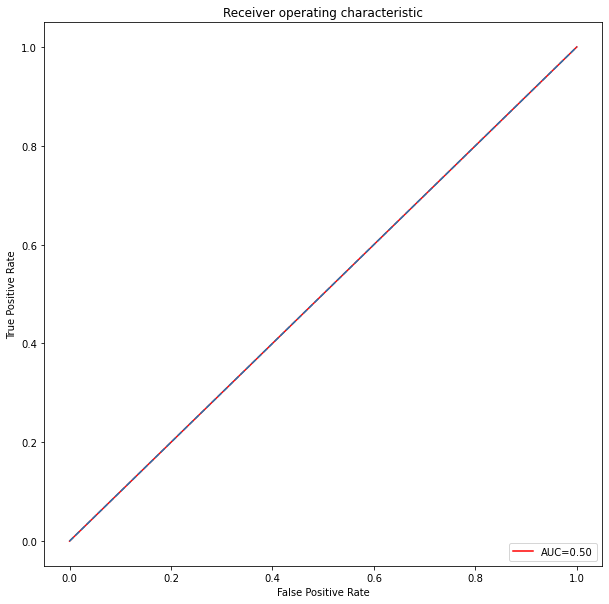

In [164]:
plt.figure(figsize=(10, 10))
plt.title('Receiver operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label=f'AUC={roc_auc:0.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], ls='--')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Vidéo 4/5 - Entraîner une régression logistique et une SVM

1. Entraîner une régression logistique
2. Entraîner une SVM

Temps important sur l'analyse des résultats et leur compréhension

### Régression logistique

In [165]:
estimator = LogisticRegression(solver='liblinear')
estimator.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [166]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [167]:
y_prob = estimator.predict_proba(X_test).round(2)
y_prob

array([[1.  , 0.  ],
       [0.09, 0.91],
       [0.  , 1.  ],
       ...,
       [0.09, 0.91],
       [1.  , 0.  ],
       [0.95, 0.05]])

In [168]:
score(estimator)
confusion(y_test, y_pred)

score train : 0.9485, score test 0.9491


,pred_0,pred_1
test_0,1201,56
test_1,68,1113


In [169]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9489355797205421

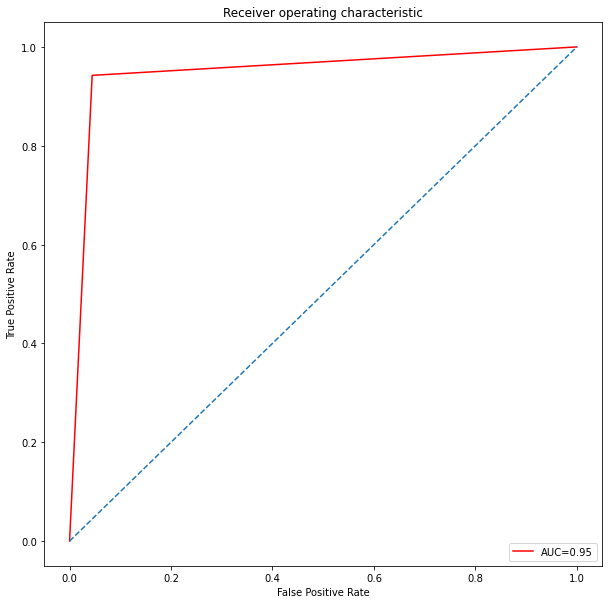

In [170]:
plt.figure(figsize=(10, 10))
plt.title('Receiver operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label=f'AUC={roc_auc:0.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], ls='--')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### SVM

In [171]:
estimator = LinearSVC()
estimator.fit(X_train, y_train)

c:\Users\franc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [172]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [174]:
score(estimator)
confusion(y_test, y_pred)

score train : 0.9469, score test 0.9463


,pred_0,pred_1
test_0,1202,55
test_1,76,1105


In [175]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9459463919914693

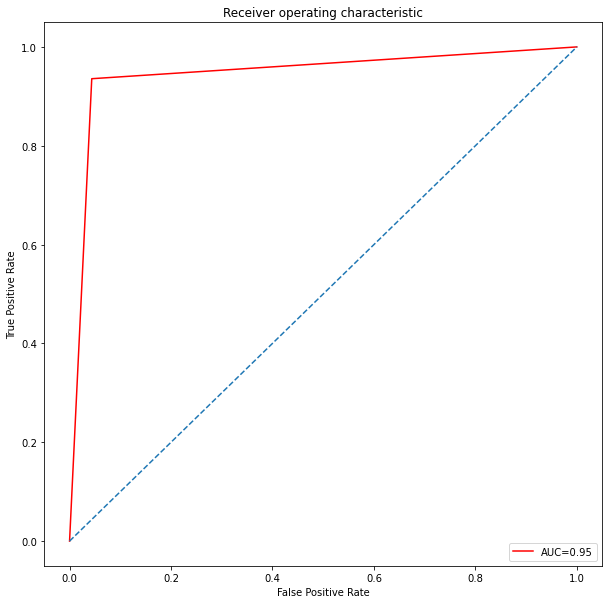

In [176]:
plt.figure(figsize=(10, 10))
plt.title('Receiver operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label=f'AUC={roc_auc:0.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], ls='--')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Vidéo 5/5 - Trouver les meilleurs hyperparamètres

1. Utiliser une GridSearch
2. Analyser ses résultats
3. Ré-entraîner les modèles avec les meilleurs paramètres

### régression logistique

In [240]:
estimator = LogisticRegression()

params = {
    'C': np.logspace(-5, 5, 11),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}
grid = GridSearchCV(
    estimator,
    params,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 165 candidates, totalling 1650 fits


c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
880 fits failed out of a total of 1650.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    so

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             return_train_score=True, verbose=1)

In [241]:
best_params = grid.best_params_
best_params

{'C': 10000.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [180]:
res = grid.cv_results_
res

{'mean_fit_time': array([3.19569111e-03, 3.19848061e-03, 3.60959053e-02, 1.86599112e-01,
        7.85979986e-02, 7.90007591e-02, 4.09829617e-03, 2.70049572e-03,
        1.87502646e-01, 2.40495729e-01, 1.69798112e-01, 9.02992964e-02,
        3.09736729e-03, 3.69877815e-03, 4.62499714e-01, 3.03899574e-01,
        1.94601512e-01, 1.92498899e-01, 3.09958458e-03, 3.09908390e-03,
        9.93726072e+00, 3.53499341e-01, 1.92598438e-01, 2.38300014e-01,
        5.79912663e-03, 2.90131569e-03, 1.12374640e+01, 5.69902372e-01,
        1.30600429e-01, 2.93400240e-01, 2.79929638e-03, 3.00014019e-03,
        1.29628010e+01, 7.28902316e-01, 1.73698187e-01, 4.11497712e-01,
        7.50052929e-03, 4.70120907e-03, 1.05174036e+01, 7.65599728e-01,
        1.50299978e-01, 4.83299851e-01]),
 'std_fit_time': array([4.04513528e-04, 8.73145771e-04, 4.45935694e-03, 4.16353223e-02,
        2.21901750e-02, 1.83996222e-02, 1.13617012e-03, 6.40491596e-04,
        5.92329950e-02, 6.82915186e-02, 4.34502255e-02, 1.372

In [181]:
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003196,0.000405,0.000000,0.000000,0.001,l1,newton-cg,"{'C': 0.001, 'penalty': 'l1', 'solver': 'newto...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.003198,0.000873,0.000000,0.000000,0.001,l1,lbfgs,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.036096,0.004459,0.025101,0.024630,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.755712,0.789104,...,0.772718,0.771546,0.769201,0.769982,0.772177,0.771981,0.769050,0.774521,0.771368,0.001781
3,0.186599,0.041635,0.004297,0.001677,0.001,l2,newton-cg,"{'C': 0.001, 'penalty': 'l2', 'solver': 'newto...",0.873462,0.899824,...,0.880399,0.880790,0.878640,0.880594,0.881008,0.881399,0.880227,0.881204,0.880330,0.001055
4,0.078598,0.022190,0.004104,0.000830,0.001,l2,lbfgs,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}",0.873462,0.899824,...,0.880399,0.880790,0.878640,0.880594,0.881008,0.881399,0.880227,0.881204,0.880330,0.001055
5,0.079001,0.018400,0.004198,0.000979,0.001,l2,liblinear,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.861160,0.891037,...,0.871409,0.869846,0.869846,0.870823,0.867722,0.871630,0.870066,0.871434,0.870110,0.001349
6,0.004098,0.001136,0.000000,0.000000,0.01,l1,newton-cg,"{'C': 0.01, 'penalty': 'l1', 'solver': 'newton...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.002700,0.000640,0.000000,0.000000,0.01,l1,lbfgs,"{'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.187503,0.059233,0.013200,0.027636,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.905097,0.920914,...,0.903654,0.905609,0.907758,0.904241,0.906018,0.902892,0.904259,0.903869,0.904541,0.001632
9,0.240496,0.068292,0.004506,0.001206,0.01,l2,newton-cg,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton...",0.903339,0.910369,...,0.908736,0.909126,0.911276,0.908149,0.908753,0.909340,0.908949,0.909144,0.909231,0.000786


In [182]:
cols = [i for i in res.columns if 'split' not in i]
res = res[cols]
res = res.sort_values('rank_test_score')
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
41,0.483300,0.105766,0.003601,0.001113,1000.0,l2,liblinear,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'libl...",0.960604,0.012444,1,0.961817,0.003653
39,0.765600,0.078471,0.004000,0.000447,1000.0,l2,newton-cg,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'newt...",0.960427,0.012621,2,0.961993,0.003726
38,10.517404,1.486301,0.002504,0.000804,1000.0,l1,liblinear,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'libl...",0.959900,0.012408,3,0.961309,0.003725
32,12.962801,2.205148,0.003698,0.000459,100.0,l1,liblinear,"{'C': 100.0, 'penalty': 'l1', 'solver': 'libli...",0.959900,0.012359,4,0.961348,0.003603
33,0.728902,0.153368,0.009001,0.010334,100.0,l2,newton-cg,"{'C': 100.0, 'penalty': 'l2', 'solver': 'newto...",0.959900,0.012461,5,0.961289,0.003506
26,11.237464,3.248307,0.006000,0.006678,10.0,l1,liblinear,"{'C': 10.0, 'penalty': 'l1', 'solver': 'liblin...",0.959196,0.012609,6,0.960547,0.004095
35,0.411498,0.125193,0.003401,0.000491,100.0,l2,liblinear,"{'C': 100.0, 'penalty': 'l2', 'solver': 'libli...",0.959020,0.012593,7,0.960859,0.003643
40,0.150300,0.028908,0.004001,0.001097,1000.0,l2,lbfgs,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.953920,0.010319,8,0.955603,0.002327
27,0.569902,0.164532,0.003502,0.000501,10.0,l2,newton-cg,"{'C': 10.0, 'penalty': 'l2', 'solver': 'newton...",0.953744,0.011106,9,0.954958,0.002697
34,0.173698,0.036837,0.004902,0.002736,100.0,l2,lbfgs,"{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.953569,0.010878,10,0.955896,0.002976


In [183]:
def resultize(grid):
    """make a fancy df from grid.cv_results"""
    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [i for i in res.columns if 'split' not in i]
    res = res[cols]
    res = res.sort_values('rank_test_score')
    return res

In [184]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
41,0.483300,0.105766,0.003601,0.001113,1000.0,l2,liblinear,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'libl...",0.960604,0.012444,1,0.961817,0.003653
39,0.765600,0.078471,0.004000,0.000447,1000.0,l2,newton-cg,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'newt...",0.960427,0.012621,2,0.961993,0.003726
38,10.517404,1.486301,0.002504,0.000804,1000.0,l1,liblinear,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'libl...",0.959900,0.012408,3,0.961309,0.003725
32,12.962801,2.205148,0.003698,0.000459,100.0,l1,liblinear,"{'C': 100.0, 'penalty': 'l1', 'solver': 'libli...",0.959900,0.012359,4,0.961348,0.003603
33,0.728902,0.153368,0.009001,0.010334,100.0,l2,newton-cg,"{'C': 100.0, 'penalty': 'l2', 'solver': 'newto...",0.959900,0.012461,5,0.961289,0.003506
26,11.237464,3.248307,0.006000,0.006678,10.0,l1,liblinear,"{'C': 10.0, 'penalty': 'l1', 'solver': 'liblin...",0.959196,0.012609,6,0.960547,0.004095
35,0.411498,0.125193,0.003401,0.000491,100.0,l2,liblinear,"{'C': 100.0, 'penalty': 'l2', 'solver': 'libli...",0.959020,0.012593,7,0.960859,0.003643
40,0.150300,0.028908,0.004001,0.001097,1000.0,l2,lbfgs,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.953920,0.010319,8,0.955603,0.002327
27,0.569902,0.164532,0.003502,0.000501,10.0,l2,newton-cg,"{'C': 10.0, 'penalty': 'l2', 'solver': 'newton...",0.953744,0.011106,9,0.954958,0.002697
34,0.173698,0.036837,0.004902,0.002736,100.0,l2,lbfgs,"{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.953569,0.010878,10,0.955896,0.002976


In [185]:
# ré-entraînement
estimator = LogisticRegression(**best_params)
estimator

LogisticRegression(C=1000.0, solver='liblinear')

In [186]:
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [187]:
score(estimator)

score train : 0.9618, score test 0.9623


In [188]:
confusion(y_test, y_pred)

,pred_0,pred_1
test_0,1210,47
test_1,45,1136


In [189]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9622530425720958

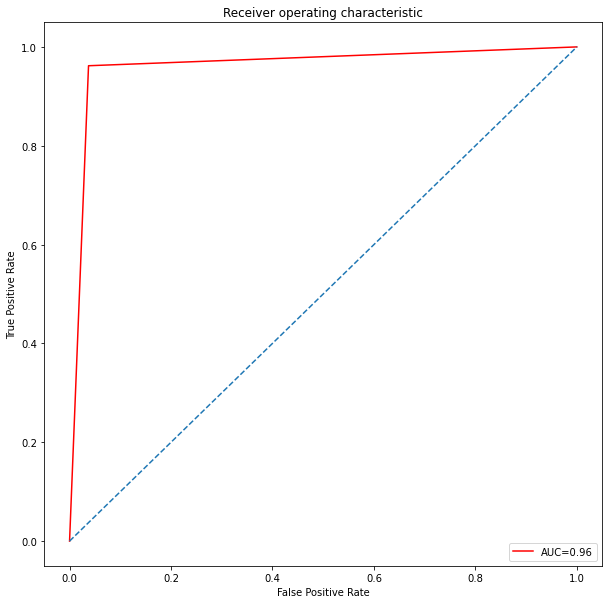

In [190]:
plt.figure(figsize=(10, 10))
plt.title('Receiver operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label=f'AUC={roc_auc:0.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], ls='--')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### SVM

In [191]:
estimator = LinearSVC()

params = {'C': np.logspace(-3, 3, 7)}
grid = GridSearchCV(
    estimator,
    params,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


c:\Users\franc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=10, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True, verbose=1)

In [192]:
best_params = grid.best_params_
best_params

{'C': 1.0}

In [193]:
res = grid.cv_results_
res

{'mean_fit_time': array([0.03399878, 0.13939881, 0.8637964 , 1.01370125, 1.03929818,
        1.15730135, 1.21389637]),
 'std_fit_time': array([0.00454044, 0.03945075, 0.15944753, 0.13962401, 0.15640685,
        0.28309661, 0.19119146]),
 'mean_score_time': array([0.02279952, 0.01870368, 0.0045032 , 0.00379961, 0.00420053,
        0.0049998 , 0.00340095]),
 'std_score_time': array([0.00386648, 0.03051772, 0.00246115, 0.00236389, 0.00334087,
        0.00252671, 0.00111447]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0},
  {'C': 1000.0}],
 'split0_test_score': array([0.91212654, 0.93321617, 0.94551845, 0.95254833, 0.93321617,
        0.93497364, 0.89806678]),
 'split1_test_score': array([0.92618629, 0.94903339, 0.96660808, 0.96836555, 0.9507

In [194]:
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.033999,0.004540,0.022800,0.003866,0.001,{'C': 0.001},0.912127,0.926186,0.910369,0.912127,...,0.914208,0.913426,0.916748,0.915380,0.914810,0.913247,0.913443,0.913834,0.914175,0.001137
1,0.139399,0.039451,0.018704,0.030518,0.01,{'C': 0.01},0.933216,0.949033,0.934974,0.933216,...,0.937463,0.939418,0.941763,0.935705,0.941579,0.936108,0.939039,0.936303,0.938230,0.002168
2,0.863796,0.159448,0.004503,0.002461,0.1,{'C': 0.1},0.945518,0.966608,0.945518,0.938489,...,0.949384,0.948994,0.947626,0.947039,0.949004,0.945487,0.948222,0.945291,0.947493,0.001389
3,1.013701,0.139624,0.003800,0.002364,1.0,{'C': 1.0},0.952548,0.968366,0.952548,0.942004,...,0.955247,0.948994,0.952316,0.952120,0.944314,0.946854,0.946463,0.947440,0.949271,0.003096
4,1.039298,0.156407,0.004201,0.003341,10.0,{'C': 10.0},0.933216,0.950791,0.785589,0.947276,...,0.780926,0.953684,0.950752,0.944890,0.917155,0.942946,0.950762,0.860688,0.918435,0.052843
5,1.157301,0.283097,0.005000,0.002527,100.0,{'C': 100.0},0.934974,0.957821,0.943761,0.927944,...,0.938245,0.939808,0.923393,0.797733,0.945487,0.951739,0.944119,0.954670,0.928575,0.044413
6,1.213896,0.191191,0.003401,0.001114,1000.0,{'C': 1000.0},0.898067,0.957821,0.938489,0.926186,...,0.935705,0.938440,0.948994,0.940199,0.930832,0.941383,0.941774,0.946854,0.936921,0.012416


In [195]:
cols = [i for i in res.columns if 'split' not in i]
res = res[cols]
res = res.sort_values('rank_test_score')
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
3,1.013701,0.139624,0.003800,0.002364,1.0,{'C': 1.0},0.947587,0.011299,1,0.949271,0.003096
2,0.863796,0.159448,0.004503,0.002461,0.1,{'C': 0.1},0.945654,0.008276,2,0.947493,0.001389
1,0.139399,0.039451,0.018704,0.030518,0.01,{'C': 0.01},0.936686,0.006242,3,0.938230,0.002168
6,1.213896,0.191191,0.003401,0.001114,1000.0,{'C': 1000.0},0.934228,0.015395,4,0.936921,0.012416
5,1.157301,0.283097,0.005000,0.002527,100.0,{'C': 100.0},0.926500,0.045542,5,0.928575,0.044413
4,1.039298,0.156407,0.004201,0.003341,10.0,{'C': 10.0},0.917166,0.049742,6,0.918435,0.052843
0,0.033999,0.004540,0.022800,0.003866,0.001,{'C': 0.001},0.913471,0.006041,7,0.914175,0.001137


In [196]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
3,1.013701,0.139624,0.003800,0.002364,1.0,{'C': 1.0},0.947587,0.011299,1,0.949271,0.003096
2,0.863796,0.159448,0.004503,0.002461,0.1,{'C': 0.1},0.945654,0.008276,2,0.947493,0.001389
1,0.139399,0.039451,0.018704,0.030518,0.01,{'C': 0.01},0.936686,0.006242,3,0.938230,0.002168
6,1.213896,0.191191,0.003401,0.001114,1000.0,{'C': 1000.0},0.934228,0.015395,4,0.936921,0.012416
5,1.157301,0.283097,0.005000,0.002527,100.0,{'C': 100.0},0.926500,0.045542,5,0.928575,0.044413
4,1.039298,0.156407,0.004201,0.003341,10.0,{'C': 10.0},0.917166,0.049742,6,0.918435,0.052843
0,0.033999,0.004540,0.022800,0.003866,0.001,{'C': 0.001},0.913471,0.006041,7,0.914175,0.001137


In [197]:
# ré-entraînement
estimator = LogisticRegression(**best_params)
estimator

LogisticRegression()

In [198]:
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred

c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [199]:
score(estimator)

score train : 0.9509, score test 0.95


In [200]:
confusion(y_test, y_pred)

,pred_0,pred_1
test_0,1200,57
test_1,65,1116


In [201]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.949807917322604

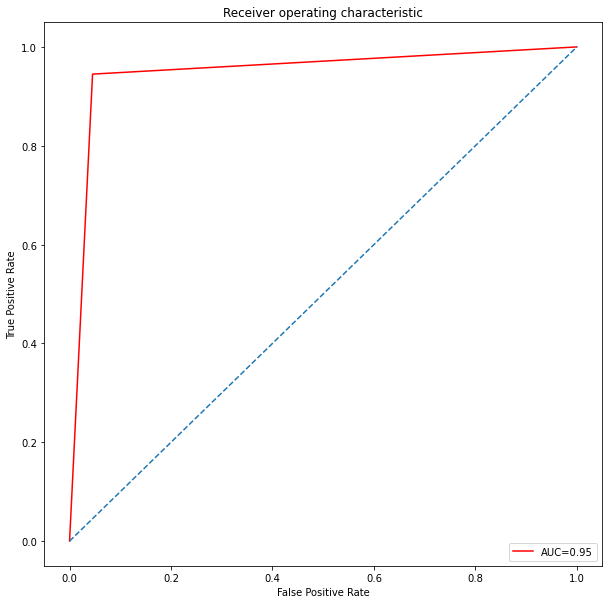

In [202]:
plt.figure(figsize=(10, 10))
plt.title('Receiver operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label=f'AUC={roc_auc:0.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], ls='--')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Aller plus loin

Salaud, c'est obligé que je le fasse, ce n'est donc pas encore terminé pour moi.

<mark>Ce cours m'aura pris infiniment plus que 10h. Combien mon gars, tu es normalement équipé pour le savoir, just do it !</mark>

* Le [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=labelencoder#sklearn.preprocessing.LabelEncoder) n’est pas conseillé dans ce genre de configuration. On lui préférera  par exemple un [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) ou un [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) . Quelles sont les limites de ce<mark>s</mark> types d’encode<mark>u</mark>rs, quand peut-on ou ne peut-on pas les utiliser? Quels autres encode<mark>u</mark>rs peut-on utiliser à la place ? Quels sont leurs limites ? 

* Nous avons travaillé sur les données brutes, mais il peut être intéressant de <mark>mettre les données à l'échelle</mark>, avec un [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) par exemple. Quel aurait été l’impact d’une telle transformation ? Quels sont les autres scalers les plus souvent utilisés ? 

* Nous n’avons pas non plus fait de réduction de dimension sur le jeu de données. Était-il utile ou pertinent de prendre toutes les dimensions à notre disposition ? Appliquer une méthode de réduction de dimensionnalité comme une PCA aurait-il été judicieux ? 

* Nous avons utilisé une Régression Logistique et une SVM Linéaire. D’autres estimateurs auraient-ils été performants ? Par exemple un [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) Classifier ou un [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision+tree). Si oui, quels hyper-paramètres aurait-on pu tester ? 

* Nous avons vu l'impact de certains hyper-paramètres sur nos modèles, pouvez vous faire un graphique avec le mean_test_score en fonction de chaque hyper-paramètre ? 

* Nous avons travaillé sur le ROC-AUC et l’accuracy score. Quelles sont les autres métriques souvent utilisées en classification ? Qu’est-ce que le recall, la précision ou le f1-score par exemple ?

**Ressources internes**
* Cours OpenClassrooms : [Initiez vous au Machine Learning](https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning).

**Ressources externes**
* Une vidéo de la chaîne freecodecamp qui couvre de façon très structurée les basiques du Machine lLearning : [vidéo](https://www.youtube.com/watch?v=0B5eIE_1vpU) (en anglais).
* La playlist de la chaine machine learnia : [série de vidéos](https://www.youtube.com/watch?v=82KLS2C_gNQ&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq) (notamment vidéos 20 à 27).
* la chaine statquest, notamment video sur la [régression logistique](https://www.youtube.com/watch?v=yIYKR4sgzI8) (en anglais) et sur les [SVM](https://www.youtube.com/watch?v=efR1C6CvhmE) (en anglais).

**Question, suggestion, remarque ?**

[Nous contacter](https://openclassrooms.zendesk.com/hc/fr/requests/new?_gl=1*1ugvg2l*_ga*MTc3OTMyNDgxOS4xNjYyNjM4Nzg0*_ga_8378XJR4H7*MTY2NDg5MDM4Mi41My4wLjE2NjQ4OTAzODIuNjAuMC4w)


## 2.5 TP feuilles d'arbres

C'est un sujet proche de l'application data à laquelle j'ai pas mal contribué et sur laquelle j'aimerais revenir fort de mes nouvelles compétences : PlantNet.

Le dataset : https://www.kaggle.com/c/leaf-classification/data

Mission : déterminer quelle est l’espèce de l’arbre à laquelle appartient la feuille.

Les caractéristiques extraites des images des feuilles sont essentiellement 3 vecteurs de dimension 64 (margin, shape & texture), dont la description du dataset détaillée se trouve ici : https://www.kaggle.com/c/leaf-classification/data

### Chargement

In [204]:
os.getcwd()

'c:\\Users\\franc\\Projects\\pepper_data-science_practising\\OC DS\\P4 C2 Entrainez un modèle prédictif linéaire'

In [215]:
import os
source_dir = 'data/source'
cleaned_dir = 'data/cleaned'
train_filename = 'trees_train.csv'
test_filename = 'trees_test.csv'
train_filepath = os.path.join(source_dir, train_filename)
test_filepath = os.path.join(source_dir, test_filename)

import pandas as pd
train = pd.read_csv(train_filepath, index_col='id')
test = pd.read_csv(test_filepath, index_col='id')
display(train)
display(test)

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953


,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,0.013672,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
1577,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,0.005859,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
1579,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,0.009766,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836


In [216]:
display(train.info())
display(train.describe(include='all'))
display(test.info())
display(test.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 1 to 1584
Columns: 193 entries, species to texture64
dtypes: float64(192), object(1)
memory usage: 1.5+ MB


None

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
unique,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Acer_Opalus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,NaN,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,NaN,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,NaN,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297


<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 4 to 1583
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 895.6 KB


None

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,0.018798,...,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,0.016229,...,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.010743,0.023438,0.013672,0.007812,0.013672,0.015625,0.000000,0.005859,0.015625,...,0.003906,0.000000,0.005859,0.001953,0.012695,0.000000,0.000000,0.003418,0.002930,0.013184
75%,0.028809,0.041016,0.042969,0.027344,0.019531,0.056641,0.029297,0.000000,0.007812,0.027344,...,0.038086,0.000000,0.019531,0.010498,0.022461,0.000000,0.000000,0.022461,0.014648,0.032227
max,0.085938,0.189450,0.167970,0.164060,0.093750,0.271480,0.087891,0.021484,0.083984,0.083984,...,0.353520,0.441410,0.153320,0.177730,0.083984,0.606450,0.123050,0.247070,0.086914,0.149410


In [217]:
display(super_freqs(train))

988

,mu,a_0,n_0,f_0,a_1,n_1,f_1,a_2,n_2,f_2,...,f_984,a_985,n_985,f_985,a_986,n_986,f_986,a_987,n_987,f_987
species,-49.000000,Acer_Opalus,10.0,0.010101010101010102,Crataegus_Monogyna,10.0,0.010101010101010102,Acer_Mono,10.0,0.010101010101010102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
margin1,18.623153,0.0,203.0,0.205051,0.001953,105.0,0.106061,0.003906,61.0,0.061616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
margin2,38.217391,0.0,207.0,0.209091,0.001953,87.0,0.087879,0.003906,63.0,0.063636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
margin3,14.461538,0.015625,52.0,0.052525,0.013672,51.0,0.051515,0.017578,41.0,0.041414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
margin4,24.488372,0.003906,86.0,0.086869,0.005859,84.0,0.084848,0.001953,70.0,0.070707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,50.202490,0.0,763.0,0.770707,0.000977,26.0,0.026263,0.001953,17.0,0.017172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
texture61,25.882619,0.0,886.0,0.894949,0.000977,10.0,0.010101,0.001953,7.0,0.007071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
texture62,61.155172,0.0,348.0,0.351515,0.000977,56.0,0.056566,0.001953,44.0,0.044444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
texture63,30.591241,0.0,411.0,0.415152,0.003906,49.0,0.049495,0.000977,39.0,0.039394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None

In [218]:
display(train.isna().sum())
display(train.duplicated().sum())
display(test.isna().sum())
display(test.duplicated().sum())

species      0
margin1      0
margin2      0
margin3      0
margin4      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 193, dtype: int64

0

margin1      0
margin2      0
margin3      0
margin4      0
margin5      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 192, dtype: int64

0

Pas de nettoyage particulier à effectuer

### Modélisation

In [219]:
# séparation X, y
X = train.drop(columns='species')
y = train.species

# NB > test ne contient pas d'étiquettes qui permettraient de vérifier les prédictions

# partition train / test (à distinguer du jeu de test final = simulation de production)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [220]:
# Classifieur naïf
estimator = DummyClassifier(strategy='most_frequent')
estimator.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [221]:
y_pred = estimator.predict(X_test)
display(y_pred)

array(['Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysophylla',
       'Quercus_Rhysophylla', 'Quercus_Rhysoph

In [222]:
pd.Series(y_pred).value_counts()

Quercus_Rhysophylla    297
dtype: int64

In [223]:
y_test.value_counts(normalize=True)

Cytisus_Battandieri        0.020202
Liquidambar_Styraciflua    0.020202
Quercus_Ilex               0.020202
Magnolia_Salicifolia       0.020202
Salix_Fragilis             0.020202
                             ...   
Lithocarpus_Edulis         0.003367
Quercus_Ellipsoidalis      0.003367
Cornus_Macrophylla         0.003367
Alnus_Rubra                0.003367
Quercus_Infectoria_sub     0.003367
Name: species, Length: 96, dtype: float64

In [224]:
tr_score = estimator.score(X_train, y_train).round(4)
ts_score = estimator.score(X_test, y_test).round(4)
print(f'score train : {tr_score}, score test {ts_score}')

score train : 0.0144, score test 0.0


In [225]:
def score(estimator):
    """compute and print train score and test score"""
    tr_score = estimator.score(X_train, y_train).round(4)
    ts_score = estimator.score(X_test, y_test).round(4)
    print(f'score train : {tr_score}, score test {ts_score}')

score(estimator)

score train : 0.0144, score test 0.0


In [226]:
pd.Series(y_train).value_counts(normalize=True).round(4)

Quercus_x_Turneri          0.0144
Quercus_Variabilis         0.0144
Quercus_Rhysophylla        0.0144
Acer_Circinatum            0.0130
Salix_Intergra             0.0130
                            ...  
Cytisus_Battandieri        0.0058
Salix_Fragilis             0.0058
Quercus_Ilex               0.0058
Magnolia_Salicifolia       0.0058
Liquidambar_Styraciflua    0.0058
Name: species, Length: 99, dtype: float64

In [227]:
pd.Series(y_test).value_counts(normalize=True).round(4)

Cytisus_Battandieri        0.0202
Liquidambar_Styraciflua    0.0202
Quercus_Ilex               0.0202
Magnolia_Salicifolia       0.0202
Salix_Fragilis             0.0202
                            ...  
Lithocarpus_Edulis         0.0034
Quercus_Ellipsoidalis      0.0034
Cornus_Macrophylla         0.0034
Alnus_Rubra                0.0034
Quercus_Infectoria_sub     0.0034
Name: species, Length: 96, dtype: float64

In [228]:
mat = confusion_matrix(y_test, y_pred)
display(mat)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [229]:
mat = pd.DataFrame(mat)
mat.columns = [f'pred_{i}' for i in mat.columns]
mat.index = [f'test_{i}' for i in mat.index]
display(mat)

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,...,pred_87,pred_88,pred_89,pred_90,pred_91,pred_92,pred_93,pred_94,pred_95,pred_96
test_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test_92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
def confusion(y_test, y_pred):
    mat = confusion_matrix(y_test, y_pred)
    mat = pd.DataFrame(mat)
    mat.columns = [f'pred_{i}' for i in mat.columns]
    mat.index = [f'test_{i}' for i in mat.index]
    return mat

display(confusion(y_test, y_pred))

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,...,pred_87,pred_88,pred_89,pred_90,pred_91,pred_92,pred_93,pred_94,pred_95,pred_96
test_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test_92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

ValueError: multiclass format is not supported

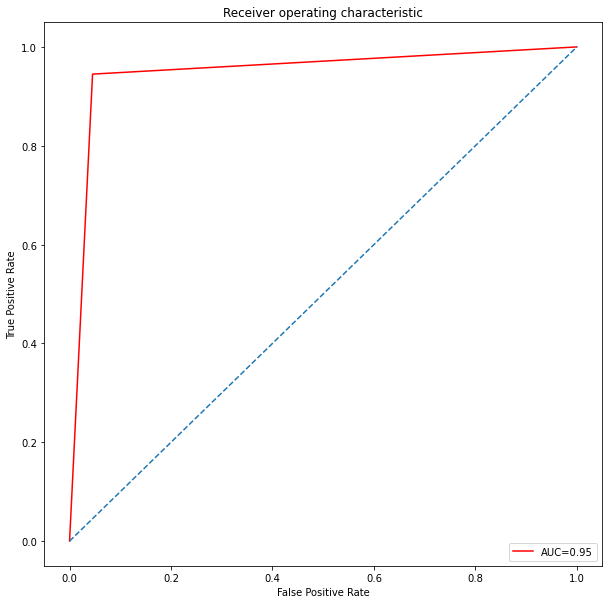

In [232]:
plt.figure(figsize=(10, 10))
plt.title('Receiver operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label=f'AUC={roc_auc:0.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], ls='--')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Régression logistique

In [233]:
estimator = LogisticRegression(solver='liblinear')
estimator.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [234]:
y_pred = estimator.predict(X_test)
y_pred

array(['Quercus_x_Turneri', 'Olea_Europaea', 'Acer_Pictum',
       'Acer_Palmatum', 'Arundinaria_Simonii', 'Quercus_Suber',
       'Acer_Rubrum', 'Quercus_x_Turneri', 'Quercus_Variabilis',
       'Quercus_Crassipes', 'Quercus_Variabilis', 'Quercus_Suber',
       'Lithocarpus_Edulis', 'Quercus_Pontica', 'Quercus_Suber',
       'Lithocarpus_Edulis', 'Quercus_Rhysophylla', 'Acer_Palmatum',
       'Quercus_Suber', 'Quercus_Rhysophylla', 'Quercus_Chrysolepis',
       'Acer_Rubrum', 'Quercus_Rhysophylla', 'Lithocarpus_Edulis',
       'Quercus_Pontica', 'Acer_Palmatum', 'Quercus_Chrysolepis',
       'Quercus_Infectoria_sub', 'Acer_Palmatum', 'Alnus_Rubra',
       'Quercus_Coccifera', 'Quercus_x_Turneri', 'Quercus_Suber',
       'Quercus_x_Turneri', 'Quercus_Chrysolepis', 'Quercus_Variabilis',
       'Acer_Rubrum', 'Quercus_Variabilis', 'Callicarpa_Bodinieri',
       'Lithocarpus_Edulis', 'Alnus_Rubra', 'Quercus_Rhysophylla',
       'Lithocarpus_Edulis', 'Alnus_Rubra', 'Tilia_Tomentosa',
     

In [235]:
y_prob = estimator.predict_proba(X_test).round(2)
y_prob

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       ...,
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]])

In [236]:
score(estimator)
confusion(y_test, y_pred)

score train : 0.3709, score test 0.165


,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,...,pred_89,pred_90,pred_91,pred_92,pred_93,pred_94,pred_95,pred_96,pred_97,pred_98
test_0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test_94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
test_95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
estimator = LogisticRegression()

params = {
    'C': np.logspace(-5, 5, 11),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

grid = GridSearchCV(
    estimator,
    params,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
    verbose=1
)
grid.fit(X_train, y_train)

NameError: name 'LogisticRegression' is not defined

In [244]:
best_params = grid.best_params_
best_params

{'C': 10000.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [245]:
# ré-entraînement
estimator = LogisticRegression(**best_params)
estimator

LogisticRegression(C=10000.0, solver='liblinear')

In [246]:
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred

array(['Acer_Pictum', 'Quercus_Phillyraeoides', 'Acer_Pictum',
       'Acer_Saccharinum', 'Ilex_Aquifolium', 'Populus_Nigra',
       'Betula_Pendula', 'Quercus_Pyrenaica', 'Celtis_Koraiensis',
       'Quercus_Crassipes', 'Quercus_Rubra', 'Quercus_Suber',
       'Liriodendron_Tulipifera', 'Celtis_Koraiensis',
       'Quercus_Alnifolia', 'Magnolia_Heptapeta', 'Ulmus_Bergmanniana',
       'Ilex_Aquifolium', 'Populus_Nigra', 'Alnus_Maximowiczii',
       'Betula_Pendula', 'Quercus_Pubescens', 'Quercus_Crassifolia',
       'Magnolia_Heptapeta', 'Quercus_Pontica', 'Quercus_Phellos',
       'Alnus_Sieboldiana', 'Alnus_Cordata', 'Magnolia_Salicifolia',
       'Alnus_Rubra', 'Quercus_Coccifera', 'Quercus_Pyrenaica',
       'Quercus_Alnifolia', 'Acer_Pictum', 'Populus_Adenopoda',
       'Quercus_Phellos', 'Crataegus_Monogyna', 'Quercus_Castaneifolia',
       'Salix_Fragilis', 'Lithocarpus_Edulis', 'Prunus_X_Shmittii',
       'Quercus_Ilex', 'Liriodendron_Tulipifera', 'Prunus_X_Shmittii',
       '

In [247]:
score(estimator)
confusion(y_test, y_pred)

score train : 1.0, score test 0.936


,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,...,pred_86,pred_87,pred_88,pred_89,pred_90,pred_91,pred_92,pred_93,pred_94,pred_95
test_0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_2,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_3,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
test_4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test_91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
test_92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
test_93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
test_94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0


### SVM

In [254]:
estimator = LinearSVC()

params = {'C': np.logspace(1, 3, 100)}
grid = GridSearchCV(
    estimator,
    params,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=10, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([  10.        ,   10.47615753,   10.97498765,   11.49756995,
         12.0450354 ,   12.61856883,   13.21941148,   13.84886371,
         14.50828778,   15.19911083,   15.92282793,   16.68100537,
         17.475284  ,   18.3073828 ,   19.17910262,   20.09233003,
         21.04904145,   22.0513074 ,   23.101297  ,   24.20128265,
         25.35364494,   26.56087783,   27.82559402,   29.15053063,
         30....
        284.80358684,  298.36472403,  312.57158497,  327.45491629,
        343.04692863,  359.38136638,  376.49358068,  394.42060594,
        413.20124001,  432.87612811,  453.48785081,  475.08101621,
        497.70235643,  521.4008288 ,  546.22772177,  572.23676594,
        599.48425032,  628.02914418,  657.93322466,  689.26121043,
        722.08090184,  756.46332755,  792.48289835,  830.21756813,
        869.74900262,  911.16275612,  954.54845666, 1000.        ])},
             return_train_score=True, verbose=1)

In [255]:
best_params = grid.best_params_
best_params

{'C': 129.1549665014884}

In [256]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
55,2.693291,0.338384,0.006004,0.001003,129.154967,{'C': 129.1549665014884},0.945155,0.020275,1,1.000000,0.000000
50,2.634200,0.148756,0.006200,0.002039,102.353102,{'C': 102.35310218990269},0.943727,0.022830,2,1.000000,0.000000
59,2.808500,0.496180,0.011600,0.016188,155.567614,{'C': 155.56761439304722},0.943706,0.020954,3,1.000000,0.000000
58,2.582699,0.204783,0.006400,0.001281,148.496826,{'C': 148.4968262254465},0.943706,0.020954,3,1.000000,0.000000
63,2.635898,0.335134,0.006501,0.001360,187.381742,{'C': 187.3817422860385},0.943706,0.020954,3,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4,1.604098,0.221585,0.008801,0.009098,12.045035,{'C': 12.045035402587823},0.916294,0.029581,96,0.998717,0.001571
3,1.494899,0.156397,0.007100,0.003506,11.49757,{'C': 11.497569953977356},0.914845,0.030747,97,0.998396,0.001434
2,1.557297,0.242319,0.006101,0.000942,10.974988,{'C': 10.974987654930562},0.913395,0.027558,98,0.998076,0.001397
1,1.475398,0.214254,0.005301,0.000459,10.476158,{'C': 10.476157527896646},0.911967,0.027843,99,0.998076,0.001397


In [258]:
# ré-entraînement
estimator = LogisticRegression(**best_params, max_iter=1000)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
score(estimator)

score train : 1.0, score test 0.9091


# A déplacer ailleurs

Là, le désir me prend d'une fonction d'analyse à réutiliser.

Etant donné un jeu de données composé des $p$ variables qualitatives et de $n$ observations.

Désignons par la famille $(\boldsymbol{x}^{(j)})_{j \in J}$ l'ensemble des $p$ variables qualitatives, indexée par l'ensemble $J = \left[\![0, \, p - 1\right]\!]$.

Posons $(A^{(j)})_{j \in J}$, l'ensemble des alphabets de modalités respectivement associés à chacune des variables $\boldsymbol{x}^{(j)}$.

Posons $q^{(j)} = |A^{(j)}|$ le cardinal de l'aphabet $A^{(j)}$.

Observons que $0 \lt q^{(j)} \le n$.

Considérons que les index 0 à $q^{(j)}$ sont attribués aux éléments de $A^{(j)}$ par ordre d'effectif décroissant des modalités, et par ordre lexicographique si deux modalités ont des effectifs identiques.

Posons $K^{(j)} = \left[\![0, \, q^{(j)} - 1\right]\!]$

Notons $a^{(j)}_k, k \in K^{(j)}$, la $k$-ième modalité de $A^{(j)}$.

Notons $n^{(j)}_k$ l'effectif de la $k$-ième modalité de $A^{(j)}$.

Observons que $\forall j \in J, \,  \displaystyle\sum_{K^{(j)}} n^{(j)}_k = n$. 

Notons enfin $\nu^{(j)}_k$ l'la fréquence relative de la $k$-ième modalité de $A^{(j)}$ ($\nu^{(j)}_k = \frac{n^{(j)}_k}{n}$).

La fonction ... produit de $p$ lignes, la ligne $j$ représentant la variable $\boldsymbol{x}^{(j)}$, dont les colonnes sont :
1. les cardinaux $q^{(j)}$ des alphabets $A^{(j)}$.
4. une mesure inspirée de la courbe de <mark>???? (la courbe des inégalités)</mark>
3. les triplets successifs $(a^{(j)}_k, n^{(j)}_k, \nu^{(j)}_k)$


Intuitivement, en prenant les cas extrèmes, ... bla

on comprend qu'il y a une relation entre $q^{(j)}$ et la fréquence moyenne

Le but est de former une mesure qui décrit la forme de la distribution des effectifs des modalités de chacune des variables.

Pour ce faire, nous souhaitons normaliser l'ensemble de ces effectifs de sorte à pouvoir les comparer à l'identité dans l'intervalle $[0, \, 1]$.

A (0, 0) correspond un effectif nul, à (1, 1) correspond l'effectif de la modalité $a_0$ d'effectif maximum.

Entre les deux, les abscisses 1/q, 2/q, .., (q - 1)/q correspondent respectivement aux modalités $a_{q-1}$, $a_{q-2}$, .., $a_1$ et les ordonnées aux effectifs de ces modalités rapportés à celui de $a_0$.

Notons $\alpha_k$ l'abscisse qui représente la modalité $a_k$, alors $\alpha_k = \frac{q - k}{q}$.

Etendons par convention pratique, l'alphabet $A$ en lui adjoignant l'élément $a_q$ d'effectif nul.

Définissons l'éffectif normalisé de $a_k$ par $\pi_k = \frac{n_k}{n_0}$.

Définissons sur [[0, q]] la fonction qui à k associe $\pi_k$.

Les termes étant posés, nous pouvons définir notre mesure.

Cette mesure $\mu$ est la surface située entre les effectifs normalisés et la droite identité, négatifs si ces effectifs sont supérieurs à la valeur identité.

En d'autres terme $\mu = \displaystyle\sum_{0 \le k \le q} (\alpha_k - \pi_k)$.

Observons que $\alpha_0 - \pi_0 = \frac{n_0}{n_0} - \frac{q}{q}  = 0$ et que $\alpha_q - \pi_q = 0$

D'où
$\mu =
\displaystyle\sum_{0 \lt k \lt q} (\alpha_k - \pi_k) =
\displaystyle\sum_{0 \lt k \lt q} (\frac{q - k}{q} - \pi_k) =
\frac{1}{q} \left( q(q - 1) - \frac{1}{2}(q - 1)q \right) - \displaystyle\sum_{0 \lt k \lt q} \pi_k$.

Soit
$\mu =
\frac{1}{2}(q - 1) - \displaystyle\sum_{0 \lt k \lt q} \pi_k =
\frac{1}{2}(q - 1) - \displaystyle\frac{n - n_0}{n_0}
$.

Appliquons à quelques cas remarquables.

**Répartition constante des effectifs**

Dans ce cas $\forall k \in [0, q-1], \, n_k = n_0 \Rightarrow \pi_k = 1$

Et donc $\mu = - \frac{1}{2}(q - 1)$

**Répartition arihtmétique des effectifs**

$n_q = 0$, $n_{q-1} = d$, $n_{q-2} = 2d$, $n_{q-k} = kd$, $n_0 = qd$.

Et donc, par changement de variable indicielle, $n_k = (q - k)d$.

On en déduit que $\pi_k = \frac{(q - k)d}{qd} = \frac{(q - k)}{q}$ et donc que $\mu = 0$.

**Un contre tous**

$n_0 = n - (q - 2)$ et $\forall k, \, 0 \lt k \lt q, \, n_k = 1$.

On en déduit que $\forall k, \, 0 \lt k \lt q, \, \pi_k = \frac{1}{n - (q - 2)}$

Et
$\mu =
\frac{1}{2}(q - 1) - \displaystyle\frac{q - 2}{n - (q - 2)}$.

Rappelons que $0 \lt q \le n$

Posons $x = q - 2$ il vient
$\mu = \frac{1}{2}(x + 1) -\displaystyle\frac{x}{n - x}$

Chercher le maximum nous mène au 3ème degré :

$\left( \frac{1}{2}(x + 1) -\displaystyle\frac{x}{n - x} \right)' = \frac{1}{2}x - \displaystyle\frac{n}{(n - x)^2}$

La dérivée s'annule pour $\frac{1}{2}x = \displaystyle\frac{n}{(n - x)^2}$

Soit en posant $y = n - x$, $(n - y)y^2 = 2n \Leftrightarrow y^3 -ny^2 + 2n = 0$

En divisant par $n^3$ et en posant $z = \displaystyle\frac{y}{n}$, il vient $z^3 - z^2 + \displaystyle\frac{2}{n^2}$.

Développons $(z - a)(z - b)(z - c) = z^3 + (a + b + c)z^2 +(ab + ac + bc)z + abc$

$\begin{cases}
      a + b + c = -1\\
      ab + ac + bc = 0\\
      abc = \displaystyle\frac{2}{n^2} > 0
\end{cases}$

... Pas suffisant pour résoudre facilement..

Je sais que j'ai deux racines négatives et une positive, aucune nulle évidemment.

Une conséquence qui ne semble mener nulle part : $(a + 1)(b + 1)(c + 1) = abc$

Tentons le coup en posant $a > 0$ et $d = -(b + c) > 0$

Alors $d = a + 1$, $bc = ad = a(a + 1)$, $abc = a^2d = a^2(a + 1)$

Résolution (méthode de Viète) :

1/ se ramener à la forme $\chi^3 + p\chi + q = 0$

Posons $z = \chi + \displaystyle\frac{1}{3}$

Nous obtenons $(\chi + \frac{1}{3})^3 - (\chi + \frac{1}{3})^2 + \displaystyle\frac{2}{n^2} = 0$

En développant et en regroupant les degrés, on obtient
$\chi^3 - \displaystyle\frac{1}{3}\chi - \displaystyle\frac{2}{27} + \displaystyle\frac{2}{n^2} = 0$

Posons $\chi = \zeta + \displaystyle\frac{1}{9 \zeta}$ et $\Zeta = \zeta^3$

Il vient $\Zeta^2 + 2\left(\displaystyle\frac{1}{n^2} - \displaystyle\frac{1}{27}\right)\Zeta + \displaystyle\frac{1}{27^2} = 0$

Dont le discriminant est
$\delta = 4\left(\displaystyle\frac{1}{n^2} - \displaystyle\frac{1}{27}\right)^2 - \displaystyle\frac{1}{27^2} =
4\left(\displaystyle\frac{1}{n^4} - \displaystyle\frac{2}{27n^2}\right) = -\displaystyle\frac{\Delta}{27}$

Notons que ce discrimant est négatif pour $n > \sqrt{\frac{27}{2}} = 3,67..$ ce qui entraîne alors que l'équation d'origine possède 3 racines réelles.

A terminer un jour de loisir..

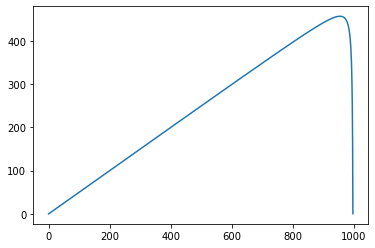

In [40]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
x = np.linspace(-1, n - 2, n).astype(float)
y = (1 / 2) * (x + 1) - x / (n - x)
plt.plot(x, y)
plt.show()
# asymptote linéaire de pente 1/2 tant que x << n
